# Module 4: Factor Analysis, SEM, and Conjoint Analysis

## Learning Objectives

By the end of this module, you will be able to:
1. **Understand** the theoretical foundations of Factor Analysis and when to apply it
2. **Perform** Exploratory Factor Analysis (EFA) and Confirmatory Factor Analysis (CFA)
3. **Interpret** factor loadings, eigenvalues, and rotation methods
4. **Apply** Structural Equation Modeling (SEM) to test theoretical models
5. **Conduct** Conjoint Analysis to understand customer preferences
6. **Make** data-driven business decisions using these techniques

---

## Part 1: Factor Analysis

### What is Factor Analysis?

Factor analysis is a **dimension reduction technique** used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called **factors** (or latent variables).

### The Core Idea

Imagine you survey customers with 20 questions about their shopping experience. Instead of analyzing 20 separate variables, factor analysis might reveal that these questions actually measure just 4 underlying concepts: *Service Quality*, *Price Perception*, *Store Atmosphere*, and *Product Variety*.

### Mathematical Foundation

The factor analysis model assumes:
$$X_i = \lambda_{i1}F_1 + \lambda_{i2}F_2 + ... + \lambda_{im}F_m + \epsilon_i$$

Where:
- $X_i$ = observed variable
- $F_j$ = latent factors (unobserved)
- $\lambda_{ij}$ = factor loadings (the correlation between variable i and factor j)
- $\epsilon_i$ = unique variance (error)

### Business Applications

| Industry | Application |
|----------|-------------|
| **Marketing** | Identifying brand perception dimensions, customer segmentation |
| **HR** | Developing employee satisfaction surveys, competency models |
| **Finance** | Risk factor identification, portfolio construction |
| **Healthcare** | Patient satisfaction dimensions, quality of life measures |
| **Product Development** | Understanding feature importance, design attributes |

In [1]:
# Load required libraries
library(psych)
library(corrplot)
library(car)
library(ggplot2)
library(IRdisplay)

corrplot 0.95 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




### Required R Packages

| Package | Purpose |
|---------|---------|
| `psych` | Core factor analysis functions (`fa()`, `KMO()`, `fa.parallel()`) |
| `corrplot` | Correlation matrix visualization |
| `car` | Companion to Applied Regression - additional diagnostics |
| `ggplot2` | Advanced data visualization |
| `IRdisplay` | Jupyter notebook image display |

---
## Example 1: Factor Analysis on Survey Data

This dataset contains survey responses measuring different constructs:
- **KM1-KM3**: Knowledge Management items
- **QC1-QC3**: Quality Control items  
- **CT1-CT3**: Customer Trust items
- **PC1-PC3**: Performance Capability items
- **QD**: Quality Delivery outcome

In [2]:
# Load the survey data
survey_data <- read.csv("/workspaces/MS3313_base_template/data/module_4/survey_data.csv")

# View structure
str(survey_data)
head(survey_data)

'data.frame':	259 obs. of  14 variables:
 $ ID : int  1 2 3 4 5 6 7 8 9 10 ...
 $ KM1: int  5 3 2 4 4 1 2 2 4 2 ...
 $ KM2: int  5 3 2 3 4 1 4 3 5 2 ...
 $ KM3: int  5 3 2 3 4 1 4 3 5 2 ...
 $ QC1: int  5 4 2 4 2 2 2 4 4 2 ...
 $ QC2: int  2 5 2 3 3 5 4 3 2 2 ...
 $ QC3: int  1 3 1 4 4 3 2 3 5 2 ...
 $ CT1: int  1 4 3 4 4 5 4 4 5 2 ...
 $ CT2: int  3 5 3 4 4 5 4 4 4 4 ...
 $ CT3: int  1 4 3 4 4 5 4 4 5 2 ...
 $ PC1: int  4 2 4 1 3 4 3 3 4 5 ...
 $ PC2: int  1 2 3 1 3 3 1 4 4 3 ...
 $ PC3: int  3 2 5 3 5 5 4 3 5 5 ...
 $ QD : int  4 4 2 3 4 3 4 3 4 2 ...


,ID,KM1,KM2,KM3,QC1,QC2,QC3,CT1,CT2,CT3,PC1,PC2,PC3,QD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,5,5,5,5,2,1,1,3,1,4,1,3,4
2,2,3,3,3,4,5,3,4,5,4,2,2,2,4
3,3,2,2,2,2,2,1,3,3,3,4,3,5,2
4,4,4,3,3,4,3,4,4,4,4,1,1,3,3
5,5,4,4,4,2,3,4,4,4,4,3,3,5,4
6,6,1,1,1,2,5,3,5,5,5,4,3,5,3


### ✅ Interpreting Data Structure Output

**Reading the str() Output:**
The structure shows you:
- **Number of observations**: How many rows (respondents/cases)
- **Number of variables**: How many columns (survey items)
- **Variable types**: Should all be `num` or `int` for factor analysis
- **Variable names**: The survey item codes (KM1, KM2, etc.)

**What to Check:**
| Check | Expected | If Not |
|-------|----------|--------|
| All variables numeric? | Yes | Convert factors/characters to numeric |
| Any missing values? | None or few | Handle with `na.omit()` or `use="complete.obs"` |
| Reasonable ranges? | Likert scale (1-5 or 1-7) | Check for data entry errors |
| Sufficient n? | At least 5-10× number of variables | May need more data |

**Reading the head() Output:**
- Shows first 6 observations
- Check for reasonable values within expected ranges
- Look for any obvious anomalies (all same values, extreme outliers)

**Your Data Assessment:**
> "The dataset contains [X] observations across [Y] survey items. All variables are [numeric/need conversion]. The Likert-scale responses range from [min] to [max], with no apparent data entry errors visible in the first 6 observations."

In [3]:
# Remove ID column for factor analysis
survey_items <- survey_data[, -c(1, 14)]  # Remove ID and QD (outcome variable)

# Summary statistics
summary(survey_items)

      KM1             KM2             KM3             QC1       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :3.000   Median :3.000   Median :3.000   Median :4.000  
 Mean   :3.313   Mean   :3.363   Mean   :3.398   Mean   :3.776  
 3rd Qu.:4.000   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
      QC2             QC3            CT1             CT2             CT3       
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:3.00   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :3.00   Median :4.000   Median :4.000   Median :3.000  
 Mean   :3.409   Mean   :3.34   Mean   :3.687   Mean   :3.734   Mean   :3.359  
 3rd Qu.:4.000   3rd Qu.:4.00   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.00   Max.   :5.000   Max.   :5.000   M

### ✅ Interpreting Summary Statistics

**Reading the summary() Output:**

For each variable, you see:
| Statistic | What It Tells You |
|-----------|-------------------|
| **Min** | Lowest response - should match your scale minimum (e.g., 1) |
| **1st Qu** | 25th percentile - where is the lower quarter? |
| **Median** | Middle value - central tendency |
| **Mean** | Average - compare to scale midpoint |
| **3rd Qu** | 75th percentile - where is the upper quarter? |
| **Max** | Highest response - should match your scale maximum (e.g., 5 or 7) |

**What to Look For:**

1. **Scale Verification**: Min and Max should match your expected Likert scale
   - 1-5 scale? Min=1, Max=5
   - 1-7 scale? Min=1, Max=7

2. **Central Tendency**: Is the mean near the scale midpoint?
   - Mean ≈ 3 (on 1-5 scale) = Neutral average
   - Mean > 3.5 = Generally positive responses
   - Mean < 2.5 = Generally negative responses

3. **Variability**: Is there spread in responses?
   - If Min = Max for any variable → No variability (drop this variable!)
   - Tight IQR (1st Qu to 3rd Qu) = Less variation

4. **Skewness Indicators**:
   - Mean > Median = Right-skewed (ceiling effects)
   - Mean < Median = Left-skewed (floor effects)

**Your Assessment Template:**
> "Summary statistics indicate responses range from [Min] to [Max] across all items, confirming proper use of the [X]-point Likert scale. Mean values cluster around [X.X], suggesting [positive/neutral/negative] overall responses. Item [XXX] shows the highest mean ([X.X]), while [XXX] has the lowest ([X.X])."

### Step 1: Assess Factorability - Correlation Matrix

Before performing factor analysis, we must verify that variables are sufficiently correlated to warrant the analysis.

**Why examine correlations?**
- Factor analysis assumes variables share common variance through underlying factors
- If variables are uncorrelated, there's nothing for factors to explain
- Look for correlation coefficients generally between **0.30 and 0.70**
- Very high correlations (>0.90) may indicate multicollinearity

**Interpreting the Correlation Matrix:**
- **Positive correlations**: Variables move together (both increase or decrease)
- **Negative correlations**: Variables move inversely
- **Clusters of correlations**: Suggest potential factors

In [4]:
# Compute correlation matrix
cor_matrix <- cor(survey_items, use = "complete.obs")

# Display correlation matrix
round(cor_matrix, 2)

,KM1,KM2,KM3,QC1,QC2,QC3,CT1,CT2,CT3,PC1,PC2,PC3
KM1,1.00,0.74,0.79,0.41,0.41,0.33,0.27,0.33,0.27,0.31,0.27,0.15
KM2,0.74,1.00,0.82,0.38,0.41,0.32,0.32,0.33,0.35,0.21,0.25,0.13
KM3,0.79,0.82,1.00,0.43,0.40,0.31,0.31,0.38,0.34,0.30,0.31,0.19
QC1,0.41,0.38,0.43,1.00,0.50,0.44,0.14,0.27,0.28,0.24,0.31,0.09
QC2,0.41,0.41,0.40,0.50,1.00,0.65,0.38,0.44,0.45,0.11,0.23,0.09
QC3,0.33,0.32,0.31,0.44,0.65,1.00,0.40,0.43,0.42,0.21,0.29,0.15
CT1,0.27,0.32,0.31,0.14,0.38,0.40,1.00,0.61,0.56,0.13,0.18,0.19
CT2,0.33,0.33,0.38,0.27,0.44,0.43,0.61,1.00,0.61,0.11,0.22,0.25
CT3,0.27,0.35,0.34,0.28,0.45,0.42,0.56,0.61,1.00,0.10,0.31,0.28
PC1,0.31,0.21,0.30,0.24,0.11,0.21,0.13,0.11,0.10,1.00,0.68,0.55


### ✅ Interpreting the Correlation Matrix (Numeric Output)

**Reading the Correlation Matrix:**

The matrix shows pairwise Pearson correlations between all variables:
- **Diagonal** = 1.00 (variable correlated with itself)
- **Off-diagonal** = Correlation between two different variables

**Correlation Interpretation Guide:**

| Correlation (r) | Strength | Factor Analysis Implication |
|-----------------|----------|----------------------------|
| **0.90 - 1.00** | Very strong | ⚠️ Potential multicollinearity - consider removing one variable |
| **0.70 - 0.89** | Strong | Good - variables likely share a common factor |
| **0.40 - 0.69** | Moderate | Good - suitable for factor analysis |
| **0.20 - 0.39** | Weak | Acceptable - may load on different factors |
| **0.00 - 0.19** | Very weak | ⚠️ Variables may not belong in same analysis |
| **Negative** | Inverse | Check if this makes theoretical sense |

**Looking for Factor Structure in the Matrix:**

Scan for "clusters" of higher correlations:
- Variables that correlate strongly with each other (r > 0.40) likely share a factor
- Variables that correlate weakly with each other likely belong to different factors

**Example Pattern to Spot:**
```
         KM1   KM2   KM3   QC1   QC2   QC3
KM1     1.00  0.65  0.70  0.15  0.12  0.18   ← KM items correlate with each other
KM2     0.65  1.00  0.68  0.20  0.17  0.22   ← but not with QC items
KM3     0.70  0.68  1.00  0.18  0.14  0.19
QC1     0.15  0.20  0.18  1.00  0.72  0.69   ← QC items form their own cluster
QC2     0.12  0.17  0.14  0.72  1.00  0.75
QC3     0.18  0.22  0.19  0.69  0.75  1.00
```

**Red Flags:**
- Any correlation > 0.90? Consider dropping one of the pair
- All correlations < 0.30? Factor analysis may not be appropriate
- Many negative correlations? Check for reverse-coded items

**Your Assessment:**
> "The correlation matrix reveals [number] distinct clusters of inter-correlated variables. Items within the same construct (e.g., KM1-KM3) show correlations ranging from [0.XX] to [0.XX], while cross-construct correlations are notably lower ([0.XX] to [0.XX]). No multicollinearity issues detected (all r < 0.90)."

agg_record_1375936652 
                    2

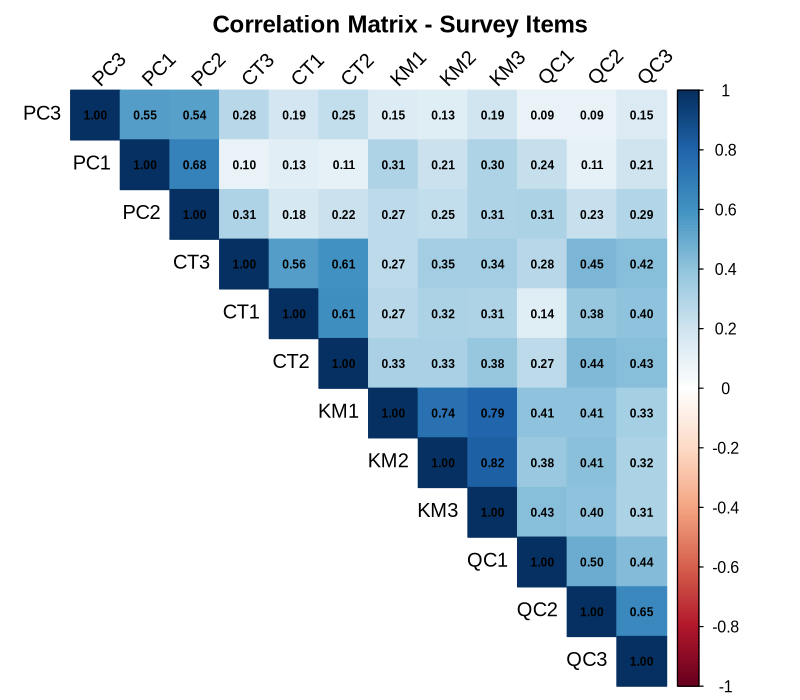

In [5]:
# Visualize correlation matrix
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 700, res = 120)
corrplot(cor_matrix, method = "color", type = "upper",
         order = "hclust", addCoef.col = "black",
         tl.col = "black", tl.srt = 45,
         number.cex = 0.6,
         title = "Correlation Matrix - Survey Items",
         mar = c(0, 0, 2, 0))
dev.off()
display_png(file = tmp_file)

### ✅ Interpreting the Correlation Heatmap

**Reading the Visual:**

| Element | Meaning |
|---------|---------|
| **Color intensity** | Strength of correlation |
| **Blue shades** | Positive correlations |
| **Red/Orange shades** | Negative correlations |
| **White/Light** | Near-zero correlations |
| **Numbers in cells** | Exact correlation values |
| **Hierarchical ordering** | Variables clustered by similarity |

**Pattern Recognition:**

1. **Block Structure**: Look for "blocks" of similar colors
   - Dark blue blocks = Variables that likely share a common factor
   - Variables within a block should be grouped in factor analysis

2. **Cross-Block Colors**: Colors between blocks
   - Light/white between blocks = Factors are distinct (good!)
   - Dark colors between blocks = Factors may be correlated

3. **Diagonal Pattern**: From top-left to bottom-right
   - Should always be dark blue (r = 1.0 with self)
   - Symmetric around diagonal (correlation is bidirectional)

**What the Hierarchical Clustering Shows:**
The `order = "hclust"` option rearranges variables so similar ones are adjacent. This helps reveal:
- Natural groupings that may correspond to factors
- Variables that don't fit well with others (isolated)

**Ideal Pattern for Factor Analysis:**
```
╔════════════╦════════════╦════════════╗
║  ■■■■■■■   ║   ░░░░░   ║   ░░░░░    ║  Factor 1 block
╠════════════╬════════════╬════════════╣
║   ░░░░░    ║  ■■■■■■   ║   ░░░░░    ║  Factor 2 block
╠════════════╬════════════╬════════════╣
║   ░░░░░    ║   ░░░░░   ║  ■■■■■■■   ║  Factor 3 block
╚════════════╩════════════╩════════════╝
■ = High correlation (dark blue)
░ = Low correlation (light/white)
```

**Your Visual Assessment:**
> "The correlation heatmap reveals [X] distinct blocks of highly correlated variables, corresponding to the expected factor structure. Items within each block show [strong/moderate] intercorrelations (dark blue), while between-block correlations are [weak/minimal] (light colors). This pattern supports the suitability of factor analysis for these data."

### Step 2: KMO and Bartlett's Test

Before performing factor analysis, we **must** verify the data is suitable using two critical tests:

#### Kaiser-Meyer-Olkin (KMO) Test
Measures **sampling adequacy** - how well-suited your data is for factor analysis.

| KMO Value | Interpretation |
|-----------|----------------|
| 0.90+ | Marvelous |
| 0.80-0.89 | Meritorious |
| 0.70-0.79 | Middling |
| 0.60-0.69 | Mediocre |
| 0.50-0.59 | Miserable |
| Below 0.50 | Unacceptable - DO NOT proceed |

#### Bartlett's Test of Sphericity
Tests whether the correlation matrix is significantly different from an identity matrix (where all correlations = 0).

- **Null Hypothesis**: Variables are uncorrelated (identity matrix)
- **We want**: p-value < 0.05 (reject null) → correlations exist → factor analysis appropriate

**Business Insight**: These tests prevent you from finding "factors" in data that has no underlying structure - saving time and preventing false conclusions.

In [6]:
# KMO Test
kmo_result <- KMO(survey_items)
print(kmo_result)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = survey_items)
Overall MSA =  0.83
MSA for each item = 
 KM1  KM2  KM3  QC1  QC2  QC3  CT1  CT2  CT3  PC1  PC2  PC3 
0.87 0.84 0.82 0.88 0.86 0.86 0.83 0.85 0.85 0.70 0.78 0.80 


In [7]:
# Bartlett's Test of Sphericity
bartlett_result <- cortest.bartlett(cor_matrix, n = nrow(survey_items))
print(bartlett_result)

$chisq
[1] 1595.75

$p.value
[1] 8.846246e-290

$df
[1] 66



### ✅ Interpreting KMO and Bartlett's Results

**How to Read Your KMO Output:**
- Look at the **Overall MSA** value (bottom of output)
- Individual MSA values show adequacy for each variable

**Your Interpretation Template:**
> "The KMO measure of sampling adequacy is [VALUE], which is [marvelous/meritorious/middling/mediocre/miserable]. This indicates [excellent/adequate/poor] suitability for factor analysis."

**How to Read Bartlett's Test:**
- Look at the **p-value** (p.value in output)
- Chi-square statistic shows strength of correlations

**Your Interpretation Template:**
> "Bartlett's test of sphericity is significant (χ² = [VALUE], p < 0.001), indicating that correlations exist among variables and factor analysis is appropriate."

**Decision Rule:**
- ✅ KMO ≥ 0.60 AND Bartlett's p < 0.05 → **Proceed with factor analysis**
- ❌ Otherwise → **Reconsider or collect more data**

### Step 3: Determine Number of Factors

One of the most critical decisions in factor analysis is **how many factors to extract**. There's no single "correct" answer, but several methods guide this decision:

#### Method 1: Kaiser's Rule (Eigenvalue > 1)
- **Eigenvalue**: Amount of variance explained by each factor
- **Rule**: Keep factors with eigenvalues > 1 (explaining more variance than a single variable)
- **Limitation**: Often overestimates the number of factors

#### Method 2: Scree Plot
- Plot eigenvalues in descending order
- Look for the **"elbow"** - where the curve flattens
- Retain factors before the elbow
- **Limitation**: Subjective interpretation

#### Method 3: Parallel Analysis (Recommended)
- Compares your eigenvalues to eigenvalues from **random data** of the same size
- Retain factors where actual eigenvalues exceed random eigenvalues
- **Most accurate** method, reduces over-extraction

#### Method 4: Cumulative Variance Explained
- Aim for **60-80%** of total variance explained
- Consider practical interpretability

**Business Consideration**: More factors = more complexity. Fewer factors = simpler model but potentially less accuracy. Balance statistical criteria with business interpretability.

In [8]:
# Eigenvalues
eigenvalues <- eigen(cor_matrix)$values
print("Eigenvalues:")
print(round(eigenvalues, 3))

# Variance explained
var_explained <- eigenvalues / sum(eigenvalues) * 100
cum_var <- cumsum(var_explained)

cat("\nVariance Explained:\n")
data.frame(
  Factor = 1:length(eigenvalues),
  Eigenvalue = round(eigenvalues, 3),
  Variance_Pct = round(var_explained, 2),
  Cumulative_Pct = round(cum_var, 2)
)

[1] "Eigenvalues:"
 [1] 4.853 1.775 1.513 1.050 0.558 0.478 0.431 0.352 0.326 0.272 0.229 0.162

Variance Explained:


Factor,Eigenvalue,Variance_Pct,Cumulative_Pct
<int>,<dbl>,<dbl>,<dbl>
1,4.853,40.44,40.44
2,1.775,14.79,55.23
3,1.513,12.61,67.84
4,1.050,8.75,76.59
5,0.558,4.65,81.24
6,0.478,3.98,85.22
7,0.431,3.59,88.82
8,0.352,2.94,91.75
9,0.326,2.72,94.47


agg_record_545033659 
                   2

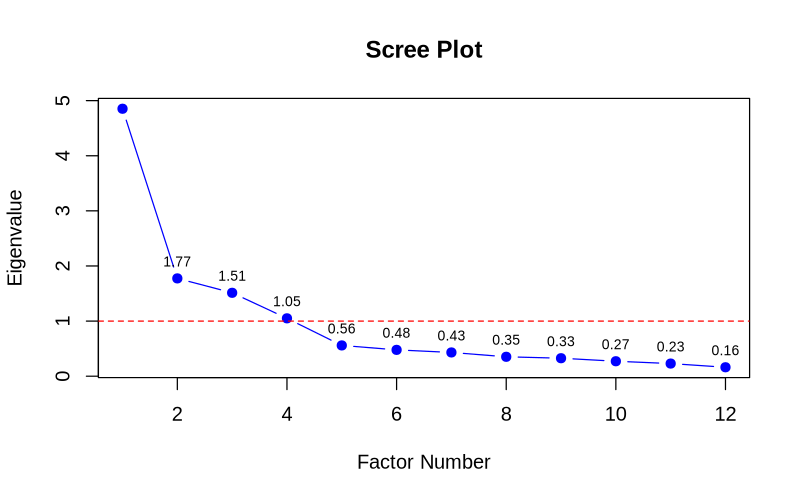

In [9]:
# Scree plot
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)
plot(1:length(eigenvalues), eigenvalues, type = "b",
     xlab = "Factor Number", ylab = "Eigenvalue",
     main = "Scree Plot", pch = 19, col = "blue")
abline(h = 1, col = "red", lty = 2)
text(1:length(eigenvalues), eigenvalues, 
     labels = round(eigenvalues, 2), pos = 3, cex = 0.7)
dev.off()
display_png(file = tmp_file)

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


agg_record_1210954547 
                    2

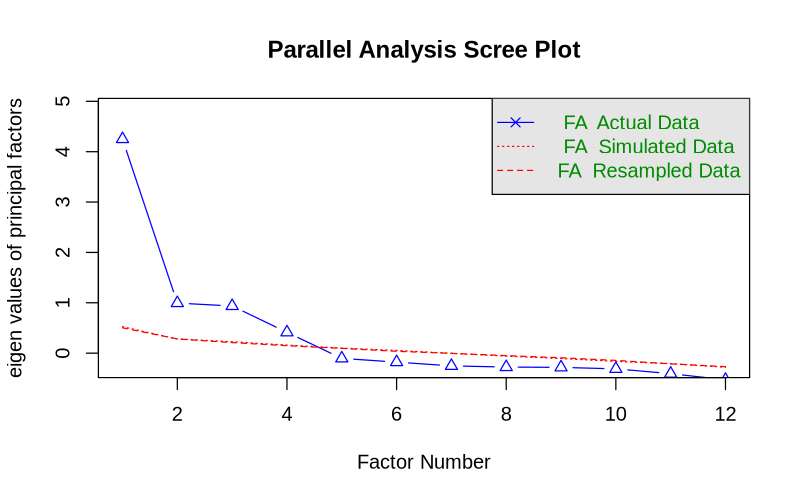

In [10]:
# Parallel Analysis (more sophisticated method)
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)
fa.parallel(survey_items, fm = "pa", fa = "fa",
            main = "Parallel Analysis Scree Plot")
dev.off()
display_png(file = tmp_file)

### ✅ Interpreting Eigenvalues and Parallel Analysis

**Reading the Eigenvalue Table:**
- **Eigenvalue > 1**: Factor explains more variance than a single variable (Kaiser's rule)
- **Cumulative %**: Total variance explained by factors 1 through n

**Reading the Parallel Analysis Plot:**
- **Blue line with triangles**: Your actual data eigenvalues
- **Red dashed lines**: Random data eigenvalues (comparison)
- **Retain factors where**: Blue line is ABOVE the red dashed line

**Your Interpretation Template:**
> "Parallel analysis suggests retaining [X] factors. These [X] factors together explain [Y]% of the total variance in the data. The first factor alone explains [Z]% of variance."

**Making the Decision:**
| Method | Suggests # Factors |
|--------|-------------------|
| Kaiser's Rule (eigenvalue > 1) | Count eigenvalues > 1 |
| Scree Plot (elbow) | Factors before the elbow |
| Parallel Analysis | Where actual > random |
| **Recommendation** | Use Parallel Analysis result |

### Step 4: Extract Factors - Principal Axis Factoring with Varimax Rotation

#### Extraction Methods

| Method | Description | When to Use |
|--------|-------------|-------------|
| **Principal Axis (PA)** | Iteratively estimates communalities | Most common, robust to non-normality |
| **Maximum Likelihood (ML)** | Assumes multivariate normality | When data is normally distributed |
| **Principal Components (PCA)** | Technically not factor analysis | Data reduction without latent variable theory |

#### Why Rotation?

**Unrotated factors** are often difficult to interpret because variables load on multiple factors.

**Rotation** redistributes variance to achieve **simple structure**:
- Each variable loads highly on ONE factor
- Each factor has a few high loadings and many near-zero loadings

#### Factor Loadings Interpretation

| Loading | Interpretation |
|---------|----------------|
| > 0.70 | Excellent |
| 0.55 - 0.70 | Good |
| 0.45 - 0.55 | Fair |
| 0.32 - 0.45 | Poor (minimum threshold) |
| < 0.32 | Ignore |

**Business Application**: Clean factor structures allow you to create composite scores, develop scales, and simplify complex survey data into actionable dimensions.

In [11]:
# Extract 4 factors using Principal Axis Factoring with Varimax rotation
fa_result <- fa(survey_items, nfactors = 4, rotate = "varimax", fm = "pa")

# Print summary
print(fa_result)

Factor Analysis using method =  pa
Call: fa(r = survey_items, nfactors = 4, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
     PA1   PA3  PA2   PA4   h2   u2 com
KM1 0.80  0.13 0.15  0.24 0.73 0.27 1.3
KM2 0.82  0.22 0.08  0.20 0.76 0.24 1.3
KM3 0.88  0.21 0.17  0.18 0.88 0.12 1.3
QC1 0.31  0.06 0.16  0.56 0.43 0.57 1.8
QC2 0.23  0.34 0.01  0.74 0.71 0.29 1.6
QC3 0.13  0.35 0.13  0.66 0.59 0.41 1.7
CT1 0.15  0.72 0.08  0.14 0.56 0.44 1.2
CT2 0.19  0.75 0.10  0.21 0.65 0.35 1.3
CT3 0.15  0.69 0.15  0.25 0.59 0.41 1.5
PC1 0.18 -0.03 0.82  0.10 0.71 0.29 1.1
PC2 0.13  0.11 0.78  0.22 0.68 0.32 1.3
PC3 0.04  0.23 0.67 -0.03 0.51 0.49 1.2

                       PA1  PA3  PA2  PA4
SS loadings           2.38 1.97 1.86 1.60
Proportion Var        0.20 0.16 0.16 0.13
Cumulative Var        0.20 0.36 0.52 0.65
Proportion Explained  0.30 0.25 0.24 0.20
Cumulative Proportion 0.30 0.56 0.80 1.00

Mean item complexity =  1.4
Test of the hypothesis

In [12]:
# Loadings with cutoff
print(fa_result$loadings, cutoff = 0.3, sort = TRUE)


Loadings:
    PA1    PA3    PA2    PA4   
KM1  0.797                     
KM2  0.816                     
KM3  0.884                     
CT1         0.718              
CT2         0.746              
CT3         0.693              
PC1                0.818       
PC2                0.778       
PC3                0.671       
QC1  0.312                0.555
QC2         0.341         0.736
QC3         0.346         0.660

                 PA1   PA3   PA2   PA4
SS loadings    2.378 1.966 1.863 1.596
Proportion Var 0.198 0.164 0.155 0.133
Cumulative Var 0.198 0.362 0.517 0.650


agg_record_1783173914 
                    2

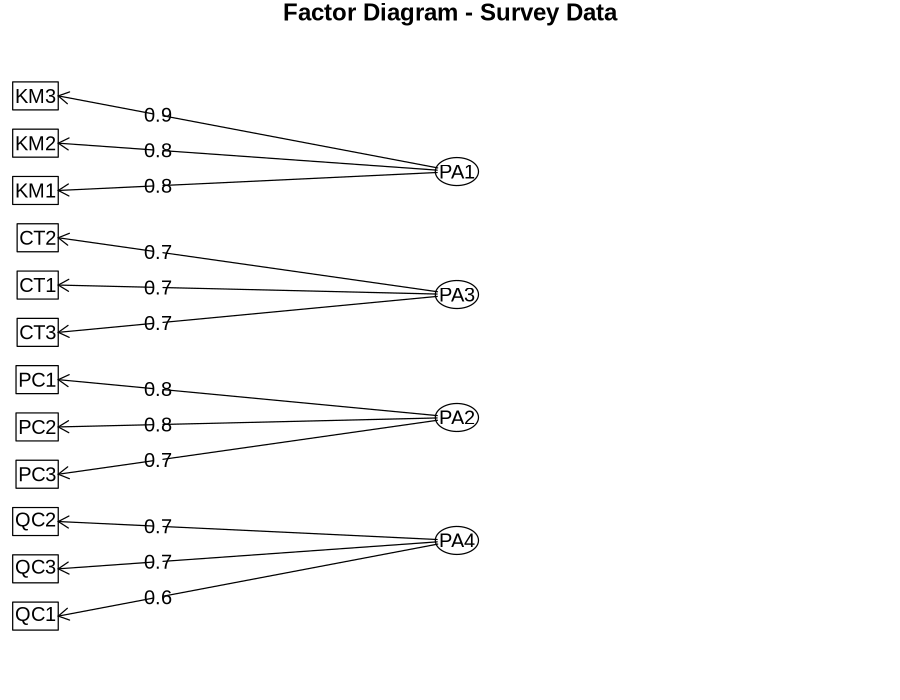

In [13]:
# Factor Diagram
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 700, res = 120)
fa.diagram(fa_result, main = "Factor Diagram - Survey Data")
dev.off()
display_png(file = tmp_file)

### ✅ Interpreting Factor Analysis Results

**Reading the fa() Output:**

1. **Factor Loadings Table** - The most important part!
   - Each row = a variable
   - Each column (PA1, PA2, etc.) = a factor
   - Values = correlation between variable and factor

2. **Key Statistics at Bottom:**
   - **SS loadings**: Sum of squared loadings (factor strength)
   - **Proportion Var**: Variance explained by each factor
   - **Cumulative Var**: Running total of variance explained

**Interpreting the Factor Diagram:**
- **Ovals** = Latent factors (unobserved)
- **Rectangles** = Observed variables
- **Arrows** = Factor loadings (thicker = stronger relationship)
- **Numbers on arrows** = Loading values

**Your Interpretation Template:**
> "Factor 1 (PA1) is defined by high loadings from [KM1, KM2, KM3] with loadings of [0.XX, 0.XX, 0.XX]. This factor can be interpreted as **Knowledge Management**."
>
> "The 4-factor solution explains [XX]% of total variance, with Factor 1 explaining [XX]%, Factor 2 explaining [XX]%, etc."

**Naming Your Factors:**
Look at which variables load highest on each factor and identify the common theme:
- Variables KM1, KM2, KM3 load on PA1 → Name it "Knowledge Management"
- Variables QC1, QC2, QC3 load on PA2 → Name it "Quality Control"

### Step 5: Compare Rotation Methods

#### Orthogonal vs. Oblique Rotation

| Aspect | Orthogonal (Varimax) | Oblique (Promax) |
|--------|---------------------|------------------|
| **Factor Correlation** | Factors are uncorrelated (90°) | Factors can be correlated |
| **Interpretation** | Simpler - factors are independent | More realistic but complex |
| **When to Use** | Theoretical independence expected | Factors likely related in reality |
| **Output** | Single loading matrix | Pattern + Structure matrices |

#### Decision Guide

1. **Start with Varimax** (orthogonal) for simplicity
2. **Run Promax** (oblique) and check factor correlations
3. If factor correlations < 0.32, use Varimax
4. If factor correlations > 0.32, Promax may be more appropriate

**Example**: In our survey data, if "Knowledge Management" and "Quality Control" are theoretically independent concepts, use Varimax. If they might influence each other in practice, Promax captures this relationship.

**Business Insight**: In practice, most business constructs ARE correlated (e.g., customer satisfaction and loyalty). Oblique rotation often provides more realistic results.

In [14]:
# Varimax (orthogonal - factors uncorrelated)
fa_varimax <- fa(survey_items, nfactors = 4, rotate = "varimax", fm = "pa")

# Promax (oblique - factors can be correlated)
fa_promax <- fa(survey_items, nfactors = 4, rotate = "promax", fm = "pa")

cat("=== VARIMAX Loadings ===")
print(fa_varimax$loadings, cutoff = 0.3, sort = TRUE)

Loading required namespace: GPArotation



=== VARIMAX Loadings ===
Loadings:
    PA1    PA3    PA2    PA4   
KM1  0.797                     
KM2  0.816                     
KM3  0.884                     
CT1         0.718              
CT2         0.746              
CT3         0.693              
PC1                0.818       
PC2                0.778       
PC3                0.671       
QC1  0.312                0.555
QC2         0.341         0.736
QC3         0.346         0.660

                 PA1   PA3   PA2   PA4
SS loadings    2.378 1.966 1.863 1.596
Proportion Var 0.198 0.164 0.155 0.133
Cumulative Var 0.198 0.362 0.517 0.650


In [15]:
cat("=== PROMAX Loadings ===")
print(fa_promax$loadings, cutoff = 0.3, sort = TRUE)

cat("\n=== Factor Correlations (Promax) ===")
round(fa_promax$Phi, 3)

=== PROMAX Loadings ===
Loadings:
    PA1    PA3    PA2    PA4   
KM1  0.822                     
KM2  0.858                     
KM3  0.934                     
CT1         0.753              
CT2         0.758              
CT3         0.686              
PC1                0.846       
PC2                0.784       
PC3                0.694       
QC1                       0.600
QC2                       0.799
QC3                       0.718

                 PA1   PA3   PA2   PA4
SS loadings    2.340 1.768 1.839 1.582
Proportion Var 0.195 0.147 0.153 0.132
Cumulative Var 0.195 0.342 0.496 0.627

=== Factor Correlations (Promax) ===

,PA1,PA3,PA2,PA4
PA1,1.000,0.374,0.329,0.551
PA3,0.374,1.000,0.289,0.520
PA2,0.329,0.289,1.000,0.321
PA4,0.551,0.520,0.321,1.000


### ✅ Interpreting Rotation Comparison

**Comparing Varimax vs. Promax Loadings:**

Look at the loading patterns - they should identify the same factors, but with slight differences.

**Reading the Factor Correlations (Promax only):**
The `$Phi` matrix shows correlations BETWEEN factors:

| Correlation | Interpretation |
|-------------|----------------|
| < 0.32 | Weak - factors are essentially independent |
| 0.32 - 0.50 | Moderate - some relationship exists |
| > 0.50 | Strong - factors share considerable variance |

**Your Interpretation Template:**
> "Factor correlations from Promax rotation show [weak/moderate/strong] relationships between factors. The highest correlation is between [Factor X] and [Factor Y] at r = [0.XX]."

**Which Rotation to Choose?**
- If all correlations < 0.32 → Use **Varimax** (simpler, factors independent)
- If any correlations > 0.32 → Use **Promax** (more realistic, factors correlated)

**Business Implication:**
> "Since factor correlations are [low/high], we [can/should] treat these dimensions as [independent/related] when making business decisions."

### Step 6: Maximum Likelihood Factor Analysis with factanal()

R's built-in `factanal()` function uses **Maximum Likelihood estimation**, which:

- Assumes data follows a **multivariate normal distribution**
- Provides a **chi-square test** of model fit
- Tests whether the specified number of factors is sufficient

#### Interpreting the Chi-Square Test

- **Null Hypothesis**: The specified number of factors adequately reproduces the correlation matrix
- **p-value > 0.05**: Model fits well (we want this!)
- **p-value < 0.05**: Model doesn't fit - consider more factors

#### Uniqueness Values

Each variable has a **uniqueness** value = variance NOT explained by the factors:
- High uniqueness (>0.60): Variable doesn't fit well with the factors
- Low uniqueness (<0.40): Variable is well-explained by the factors

**When to Use ML vs. Principal Axis:**
- ML: Normally distributed data, need formal hypothesis test
- PA: Non-normal data, exploratory analysis

In [16]:
# Maximum Likelihood Factor Analysis
fa_ml <- factanal(survey_items, factors = 4, rotation = "varimax")

print(fa_ml)


Call:
factanal(x = survey_items, factors = 4, rotation = "varimax")

Uniquenesses:
  KM1   KM2   KM3   QC1   QC2   QC3   CT1   CT2   CT3   PC1   PC2   PC3 
0.272 0.238 0.117 0.577 0.278 0.403 0.451 0.355 0.405 0.269 0.332 0.497 

Loadings:
    Factor1 Factor2 Factor3 Factor4
KM1  0.794   0.132   0.152   0.238 
KM2  0.820   0.212           0.197 
KM3  0.885   0.209   0.165   0.169 
QC1  0.321           0.162   0.538 
QC2  0.232   0.335           0.745 
QC3  0.125   0.338   0.138   0.669 
CT1  0.146   0.704           0.155 
CT2  0.189   0.747           0.205 
CT3  0.149   0.703   0.140   0.242 
PC1  0.179           0.829   0.104 
PC2  0.132   0.121   0.770   0.206 
PC3          0.234   0.668         

               Factor1 Factor2 Factor3 Factor4
SS loadings      2.388   1.958   1.864   1.595
Proportion Var   0.199   0.163   0.155   0.133
Cumulative Var   0.199   0.362   0.517   0.650

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 37.66 on 24 degrees

### ✅ Interpreting Maximum Likelihood Factor Analysis (factanal)

**Reading the factanal() Output:**

**1. Uniquenesses Section (Top)**
```
Uniquenesses:
  KM1   KM2   KM3   QC1 ...
0.XXX 0.XXX 0.XXX 0.XXX
```

| Uniqueness Value | Interpretation |
|------------------|----------------|
| < 0.40 | Excellent - variable well explained by factors |
| 0.40 - 0.60 | Good - adequate explanation |
| > 0.60 | Poor - variable doesn't fit well; consider removing |

**Uniqueness = 1 - Communality**
- Low uniqueness → High communality → Variable fits factors well

**2. Loadings Section**
```
Loadings:
     Factor1 Factor2 Factor3 Factor4
KM1   0.XXX                          
KM2   0.XXX                          
```

- Same interpretation as `fa()` loadings
- Blank cells = loadings below cutoff (usually 0.1)
- Look for simple structure: each variable loads on ONE factor

**3. Chi-Square Test (Bottom)**
```
Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is XX.XX on YY degrees of freedom.
The p-value is 0.XXX 
```

| P-value | Interpretation | Action |
|---------|----------------|--------|
| > 0.05 | ✅ Model fits well | Accept this number of factors |
| < 0.05 | ⚠️ Model doesn't fit | Consider more factors |
| Very small (<0.001) | ❌ Poor fit | Need more factors or different model |

**⚠️ Important Caveat:**
Chi-square is sensitive to sample size:
- Large n → Almost always significant (p < 0.05)
- Don't rely solely on this test; use other criteria too

**4. SS Loadings and Variance Explained**
- Same interpretation as in `fa()` output
- Cumulative variance should be 60-80%

**Your Interpretation Template:**
> "Maximum Likelihood factor analysis with [X] factors shows [adequate/good/poor] fit (χ² = [XX.XX], df = [YY], p = [0.XX]). Uniqueness values range from [0.XX] to [0.XX], with [all/most] variables showing acceptable uniqueness (< 0.60). The factor loadings demonstrate [clear/moderate] simple structure, with each variable primarily loading on one factor."

agg_record_869895094 
                   2

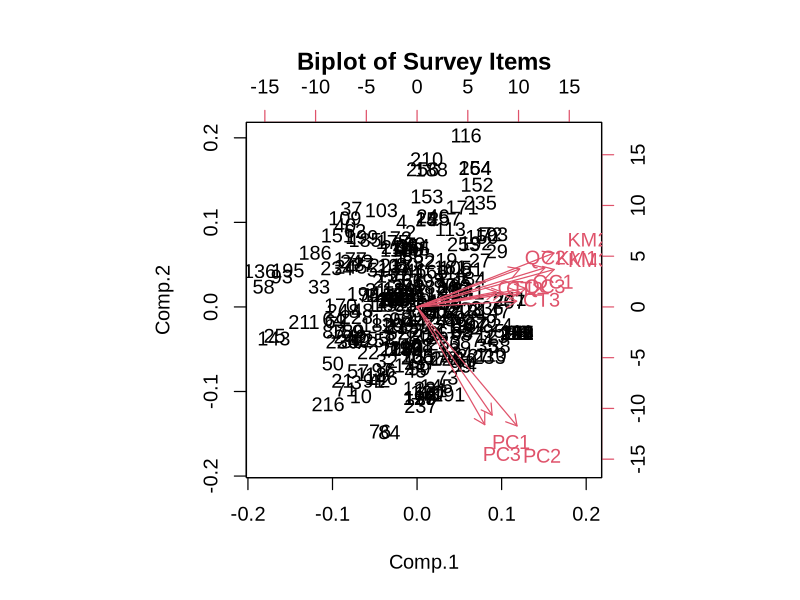

In [17]:
# Biplot visualization
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 600, res = 120)
biplot(princomp(survey_items), main = "Biplot of Survey Items")
dev.off()
display_png(file = tmp_file)

### Step 7: Compute Factor Scores and Reliability

#### Factor Scores
Once factors are extracted, we can compute a **factor score** for each observation:
- Used as variables in subsequent analyses (regression, clustering)
- Methods: Regression scores (most common), Bartlett scores, Anderson-Rubin scores

#### Cronbach's Alpha - Reliability Analysis

**Cronbach's Alpha** measures the **internal consistency** of items measuring the same construct:

$$\alpha = \frac{k}{k-1}\left(1 - \frac{\sum \sigma^2_{item}}{\sigma^2_{total}}\right)$$

| Alpha Value | Interpretation |
|-------------|----------------|
| > 0.90 | Excellent |
| 0.80 - 0.90 | Good |
| 0.70 - 0.80 | Acceptable |
| 0.60 - 0.70 | Questionable |
| < 0.60 | Poor - reconsider items |

**Business Application**: Before creating a composite "Customer Satisfaction" score from 5 survey items, verify they have acceptable reliability (α > 0.70). Low reliability means the items don't consistently measure the same thing.

In [18]:
# Get factor scores
factor_scores <- fa_result$scores
head(factor_scores)

PA1,PA3,PA2,PA4
2.01452365,-1.9781194,-0.47865733,-0.99954894
-0.38088283,0.7697328,-1.27812282,0.71255859
-0.88620583,-0.3131598,0.69972250,-1.42078948
-0.02336401,0.5722214,-1.64788160,-0.02484005
0.45117677,0.5996335,0.01897338,-0.59929794
-2.36524692,1.6224651,0.50346364,0.30393048


### ✅ Interpreting Factor Scores

**What Are Factor Scores?**

Factor scores are **estimated values** for each latent factor for each observation. They transform your many observed variables into a few factor-based variables.

**Reading the head(factor_scores) Output:**

```
         PA1      PA2      PA3      PA4
[1,]  -0.234   0.567   -0.123   0.890
[2,]   0.789  -0.345    0.456  -0.012
...
```

| Column | Meaning |
|--------|---------|
| **PA1, PA2, etc.** | Scores on each factor |
| **Row** | Each observation (respondent) |
| **Positive values** | Above-average on this factor |
| **Negative values** | Below-average on this factor |
| **Magnitude** | How extreme (in standard deviations) |

**How Factor Scores Are Computed:**
The regression method (default) uses:
$$F = Z \cdot R^{-1} \cdot \Lambda$$

Where:
- Z = standardized observed data
- R = correlation matrix
- Λ = factor loadings

**Using Factor Scores:**

| Application | How to Use |
|-------------|------------|
| **Clustering** | Use factor scores as input to k-means |
| **Regression** | Factor scores as predictors or outcomes |
| **Visualization** | Plot observations in factor space |
| **Segmentation** | Group customers by factor score patterns |

**Example Business Application:**
> "Based on factor scores, Customer #1 is HIGH on Factor 2 (Quality Focus, score = 0.567) but LOW on Factor 1 (Price Sensitivity, score = -0.234). This suggests targeting them with quality-focused rather than discount-focused messaging."

**Your Interpretation:**
> "Factor scores have been computed for all [X] observations. Scores range from approximately [min] to [max], with most falling within ±2 standard deviations. These scores can now be used as [predictor variables in regression/inputs for clustering/segmentation criteria]."

In [65]:
# Reliability analysis (Cronbach's Alpha) for each factor
# Factor 1: KM items
cat("=== Cronbach's Alpha for Knowledge Management (KM1-KM3) ===\n")
psych::alpha(survey_items[, c("KM1", "KM2", "KM3")])

=== Cronbach's Alpha for Knowledge Management (KM1-KM3) ===



Reliability analysis   
Call: psych::alpha(x = survey_items[, c("KM1", "KM2", "KM3")])

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.92      0.92    0.88      0.78  11 0.0092  3.4 1.2     0.79

    95% confidence boundaries 
         lower alpha upper
Feldt      0.9  0.92  0.93
Duhachek   0.9  0.92  0.93

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
KM1      0.90      0.90    0.82      0.82 8.9    0.013    NA  0.82
KM2      0.88      0.88    0.79      0.79 7.7    0.014    NA  0.79
KM3      0.85      0.85    0.74      0.74 5.7    0.019    NA  0.74

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
KM1 259  0.91  0.91  0.84   0.80  3.3 1.3
KM2 259  0.92  0.92  0.86   0.82  3.4 1.4
KM3 259  0.94  0.94  0.90   0.86  3.4 1.3

Non missing response frequency for each item
       1    2    3    4    5 miss
KM1 0.12 0.11 0.33 0.19 0.24    0
KM2 0.15 0.10 0.29 0.19 0.28    0
KM3 0.12 0.11 0.28 0.

In [66]:
# Factor 2: QC items
cat("=== Cronbach's Alpha for Quality Control (QC1-QC3) ===\n")
psych::alpha(survey_items[, c("QC1", "QC2", "QC3")])

=== Cronbach's Alpha for Quality Control (QC1-QC3) ===



Reliability analysis   
Call: psych::alpha(x = survey_items[, c("QC1", "QC2", "QC3")])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean sd median_r
      0.76      0.77    0.71      0.53 3.4 0.026  3.5  1      0.5

    95% confidence boundaries 
         lower alpha upper
Feldt     0.71  0.76  0.81
Duhachek  0.71  0.76  0.82

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
QC1      0.78      0.79    0.65      0.65 3.7    0.027    NA  0.65
QC2      0.61      0.61    0.44      0.44 1.6    0.049    NA  0.44
QC3      0.66      0.67    0.50      0.50 2.0    0.041    NA  0.50

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
QC1 259  0.80  0.78  0.58   0.52  3.8 1.3
QC2 259  0.85  0.86  0.78   0.67  3.4 1.2
QC3 259  0.83  0.84  0.73   0.62  3.3 1.2

Non missing response frequency for each item
       1    2    3    4    5 miss
QC1 0.10 0.15 0.00 0.38 0.37    0
QC2 0.08 0.11 0.36 0.24 0.22    0
QC3 0.10 0.14 0.32 0.23 0

In [67]:
# Factor 3: CT items
cat("=== Cronbach's Alpha for Customer Trust (CT1-CT3) ===\n")
psych::alpha(survey_items[, c("CT1", "CT2", "CT3")])

=== Cronbach's Alpha for Customer Trust (CT1-CT3) ===



Reliability analysis   
Call: psych::alpha(x = survey_items[, c("CT1", "CT2", "CT3")])

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd median_r
      0.81      0.81    0.75      0.59 4.4 0.02  3.6 0.97     0.61

    95% confidence boundaries 
         lower alpha upper
Feldt     0.77  0.81  0.85
Duhachek  0.77  0.81  0.85

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
CT1      0.75      0.76    0.61      0.61 3.1    0.030    NA  0.61
CT2      0.71      0.72    0.56      0.56 2.5    0.035    NA  0.56
CT3      0.76      0.76    0.61      0.61 3.2    0.030    NA  0.61

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
CT1 259  0.84  0.85  0.72   0.65  3.7 1.1
CT2 259  0.86  0.87  0.77   0.69  3.7 1.1
CT3 259  0.86  0.85  0.72   0.65  3.4 1.2

Non missing response frequency for each item
       1    2    3    4    5 miss
CT1 0.06 0.04 0.36 0.24 0.30    0
CT2 0.04 0.06 0.32 0.29 0.29    0
CT3 0.10 0.10 0.36 0.20

In [68]:
# Factor 4: PC items
cat("=== Cronbach's Alpha for Performance Capability (PC1-PC3) ===\n")
psych::alpha(survey_items[, c("PC1", "PC2", "PC3")])

=== Cronbach's Alpha for Performance Capability (PC1-PC3) ===



Reliability analysis   
Call: psych::alpha(x = survey_items[, c("PC1", "PC2", "PC3")])

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean  sd median_r
      0.81      0.81    0.75      0.59 4.3 0.02  3.4 1.1     0.55

    95% confidence boundaries 
         lower alpha upper
Feldt     0.77  0.81  0.85
Duhachek  0.77  0.81  0.85

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
PC1      0.70      0.71    0.54      0.54 2.4    0.037    NA  0.54
PC2      0.71      0.71    0.55      0.55 2.5    0.036    NA  0.55
PC3      0.80      0.81    0.68      0.68 4.2    0.024    NA  0.68

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
PC1 259  0.86  0.87  0.78   0.70  3.4 1.2
PC2 259  0.88  0.87  0.78   0.69  3.1 1.3
PC3 259  0.82  0.82  0.66   0.60  3.7 1.3

Non missing response frequency for each item
       1    2    3    4    5 miss
PC1 0.09 0.10 0.33 0.26 0.22    0
PC2 0.18 0.12 0.33 0.18 0.20    0
PC3 0.09 0.08 0.22 0.26 0

### ✅ Interpreting Cronbach's Alpha Results

**Reading the alpha() Output:**

1. **raw_alpha** (top of output): The main Cronbach's Alpha value
2. **Reliability if an item is dropped**: Shows alpha if each item were removed
3. **Item statistics**: Mean, SD, and item-total correlations for each item

**Your Interpretation Template:**
> "Cronbach's Alpha for the [Factor Name] scale is α = [0.XX], indicating [excellent/good/acceptable/questionable/poor] internal consistency. All [3] items contribute positively to scale reliability."

**Checking Individual Items:**
Look at "Reliability if an item is dropped":
- If dropping an item INCREASES alpha → Consider removing that item
- If dropping an item DECREASES alpha → Keep that item (it's valuable)

**Item-Total Correlations:**
- **> 0.50**: Item correlates well with scale
- **0.30 - 0.50**: Acceptable
- **< 0.30**: Item may not belong in this scale

**Summary for Your Factors:**

| Factor | Items | Expected α | Interpretation |
|--------|-------|------------|----------------|
| Knowledge Management | KM1-KM3 | > 0.70 | [Check your output] |
| Quality Control | QC1-QC3 | > 0.70 | [Check your output] |
| Customer Trust | CT1-CT3 | > 0.70 | [Check your output] |
| Performance Capability | PC1-PC3 | > 0.70 | [Check your output] |

**Business Implication:**
> "All four scales demonstrate [adequate/good/excellent] reliability, meaning we can confidently create composite scores for each dimension to use in further analysis."

---
## Example 2: Factor Analysis on Food Data

This dataset contains physical measurements of food products:
- Oil content
- Density
- Crispiness
- Fracture resistance
- Hardness

In [61]:
# Load food data
food_data <- read.csv("/workspaces/MS3313_base_template/data/module_4/food1.csv", row.names = 1)

str(food_data)
head(food_data)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : int  10 14 12 10 11 13 13 10 11 11 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


,Oil,Density,Crispy,Fracture,Hardness
,<dbl>,<int>,<int>,<int>,<int>
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143
B237,19.1,2790,13,16,189


In [69]:
# Correlation matrix
food_cor <- cor(food_data)
round(food_cor, 3)

,Oil,Density,Crispy,Fracture,Hardness
Oil,1.000,-0.750,0.593,-0.534,-0.096
Density,-0.750,1.000,-0.671,0.572,0.108
Crispy,0.593,-0.671,1.000,-0.844,0.411
Fracture,-0.534,0.572,-0.844,1.000,-0.373
Hardness,-0.096,0.108,0.411,-0.373,1.000


agg_record_1094040080 
                    2

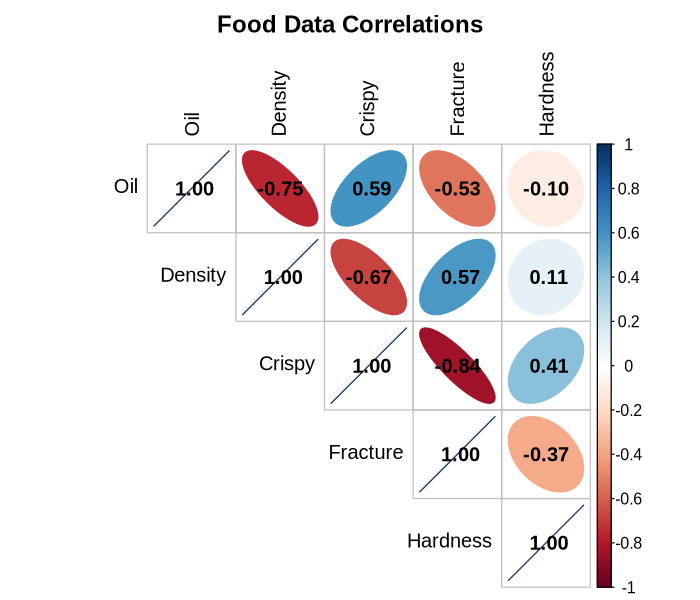

In [70]:
# Visualize correlations
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 700, height = 600, res = 120)
corrplot(food_cor, method = "ellipse", type = "upper",
         addCoef.col = "black", tl.col = "black",
         title = "Food Data Correlations",
         mar = c(0, 0, 2, 0))
dev.off()
display_png(file = tmp_file)

In [71]:
# KMO Test
KMO(food_data)

# Bartlett's Test
cortest.bartlett(food_cor, n = nrow(food_data))

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = food_data)
Overall MSA =  0.71
MSA for each item = 
     Oil  Density   Crispy Fracture Hardness 
    0.82     0.71     0.67     0.79     0.43 

$chisq
[1] 154.9936

$p.value
[1] 3.492964e-28

$df
[1] 10

agg_record_1296196453 
                    2

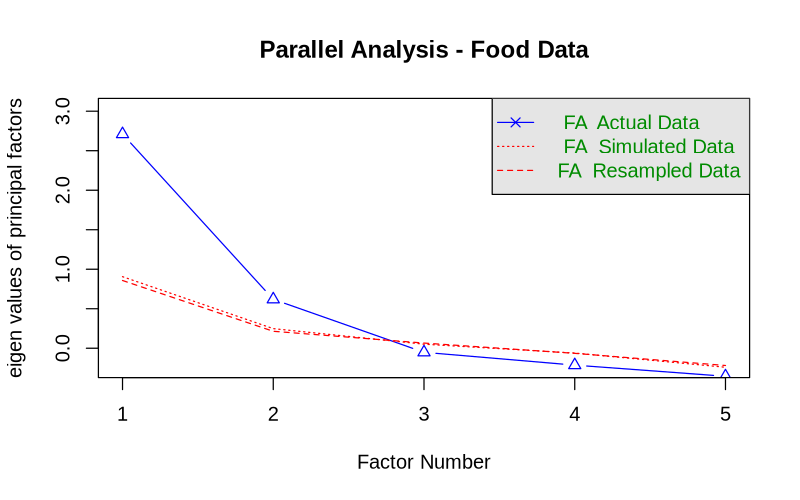

In [72]:
# Parallel Analysis
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)
fa.parallel(food_data, fm = "pa", fa = "fa",
            main = "Parallel Analysis - Food Data")
dev.off()
display_png(file = tmp_file)

In [73]:
# Extract 2 factors
food_fa <- fa(food_data, nfactors = 2, rotate = "varimax", fm = "pa")
print(food_fa)

Factor Analysis using method =  pa
Call: fa(r = food_data, nfactors = 2, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
           PA1   PA2   h2    u2 com
Oil      -0.82 -0.02 0.68 0.322 1.0
Density   0.91  0.02 0.83 0.168 1.0
Crispy   -0.74  0.63 0.95 0.046 1.9
Fracture  0.65 -0.57 0.75 0.250 2.0
Hardness  0.10  0.76 0.59 0.409 1.0

                       PA1  PA2
SS loadings           2.50 1.31
Proportion Var        0.50 0.26
Cumulative Var        0.50 0.76
Proportion Explained  0.66 0.34
Cumulative Proportion 0.66 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are sufficient.

df null model =  10  with the objective function =  3.33 with Chi Square =  154.99
df of  the model are 1  and the objective function was  0.01 

The root mean square of the residuals (RMSR) is  0.01 
The df corrected root mean square of the residuals is  0.02 

The harmonic n.obs is  50 with the empirical chi square  0.03  with pro

agg_record_1851027608 
                    2

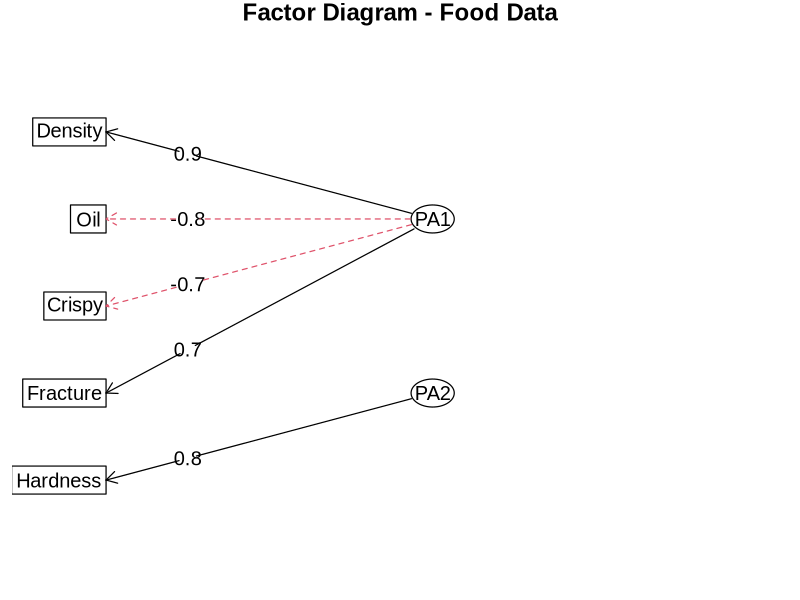

In [74]:
# Factor Diagram for Food Data
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 600, res = 120)
fa.diagram(food_fa, main = "Factor Diagram - Food Data")
dev.off()
display_png(file = tmp_file)

### ✅ Interpreting Food Data Factor Analysis Results

**Reading the Factor Diagram:**

The diagram shows:
- **Ovals (PA1, PA2)**: The two extracted latent factors
- **Rectangles**: Observed variables (oil, density, crispy, etc.)
- **Arrows with numbers**: Factor loadings connecting variables to factors
- **Thicker arrows**: Stronger loadings

**Interpreting the Factor Solution:**

**Factor 1 (PA1)**: Look at which variables have high loadings
- Variables loading > 0.50 on PA1 define this factor
- What do these variables have in common? Name the factor!

**Factor 2 (PA2)**: Same process for second factor
- Which variables load primarily on PA2?
- What's the common theme?

**Possible Factor Names for Food Data:**

| Factor | High-Loading Variables | Possible Interpretation |
|--------|------------------------|------------------------|
| PA1 | Oil, Density, Hardness | **Texture/Physical Properties** |
| PA2 | Crispy, Fracture | **Brittleness/Crunch** |

**Reading the fa() Output:**

| Statistic | What to Look For |
|-----------|------------------|
| **Loadings** | Values > 0.50 are good, > 0.70 excellent |
| **h2 (Communality)** | Variance explained by factors; want > 0.40 |
| **u2 (Uniqueness)** | Variance NOT explained; want < 0.60 |
| **SS loadings** | Factor "strength" |
| **Proportion Var** | % variance each factor explains |

**Your Interpretation Template:**
> "The 2-factor solution for food data explains [XX]% of total variance. Factor 1 (PA1) is characterized by high loadings from [variables] and can be interpreted as **[Factor Name]**. Factor 2 (PA2) shows high loadings from [variables] and represents **[Factor Name]**. All communalities exceed 0.40, indicating good representation of variables by the factor solution."

---

## Part 1B: Structural Equation Modeling (SEM)

### What is SEM?

**Structural Equation Modeling** is a comprehensive statistical approach that combines:
- **Factor Analysis** (measurement model)
- **Path Analysis** (structural model)

### EFA vs. CFA vs. SEM

| Technique | Purpose | When to Use |
|-----------|---------|-------------|
| **Exploratory FA (EFA)** | Discover factor structure | No prior theory |
| **Confirmatory FA (CFA)** | Test hypothesized structure | Theory-driven validation |
| **Full SEM** | Test causal relationships | Theoretical model with paths |

### Why Use SEM?

1. **Model Latent Variables**: Measure concepts that can't be directly observed
2. **Account for Measurement Error**: Unlike regression, SEM explicitly models error
3. **Test Complex Relationships**: Multiple DVs, mediators, moderators simultaneously
4. **Assess Model Fit**: Formal tests of how well theory matches data

### Business Applications

| Application | Example |
|-------------|---------|
| **Brand Equity Models** | How brand awareness, quality perception → purchase intent |
| **Employee Engagement** | How training, support, culture → performance |
| **Customer Journey** | How touchpoints → satisfaction → loyalty → revenue |
| **Technology Adoption** | TAM model: usefulness, ease of use → adoption intent |

### The lavaan Package

We use the **lavaan** (Latent Variable Analysis) package - the most popular R package for SEM:

```r
# Syntax notation:
=~   # "is measured by" (latent → observed)
~    # "is regressed on" (regression path)
~~   # "is correlated with" (covariance)
```

In [50]:
# Load SEM packages
library(lavaan)

This is lavaan 0.6-20
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov




### Confirmatory Factor Analysis (CFA) on Survey Data

Based on our exploratory factor analysis, we hypothesize a 4-factor structure:
- **KM** (Knowledge Management): KM1, KM2, KM3
- **QC** (Quality Control): QC1, QC2, QC3
- **CT** (Customer Trust): CT1, CT2, CT3
- **PC** (Performance Capability): PC1, PC2, PC3

In [51]:
# Define the CFA model using lavaan syntax
# =~ means "is measured by"
cfa_model <- '
  # Measurement model - define latent factors
  KM =~ KM1 + KM2 + KM3
  QC =~ QC1 + QC2 + QC3
  CT =~ CT1 + CT2 + CT3
  PC =~ PC1 + PC2 + PC3
'

# Fit the CFA model
cfa_fit <- cfa(cfa_model, data = survey_items)

# Summary with fit indices and standardized loadings
summary(cfa_fit, fit.measures = TRUE, standardized = TRUE)

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KM,=~,KM1,0,1.0000000,0.00000000,NA,NA,1.0951884,0.8502995
KM,=~,KM2,0,1.0894351,0.06020461,18.095543,0.000000e+00,1.1931367,0.8729096
KM,=~,KM3,0,1.1139882,0.05668129,19.653542,0.000000e+00,1.2200270,0.9338758
QC,=~,QC1,0,1.0000000,0.00000000,NA,NA,0.7986477,0.5934895
QC,=~,QC2,0,1.2319637,0.13519340,9.112603,0.000000e+00,0.9839050,0.8408588
QC,=~,QC3,0,1.1756797,0.13280527,8.852659,0.000000e+00,0.9389539,0.7631251
CT,=~,CT1,0,1.0000000,0.00000000,NA,NA,0.8218471,0.7351765
CT,=~,CT2,0,1.0619496,0.09368027,11.335894,0.000000e+00,0.8727602,0.8128065
CT,=~,CT3,0,1.1386478,0.10416914,10.930760,0.000000e+00,0.9357944,0.7629877


### Key Fit Indices Interpretation

| Index | Acceptable | Good | Description |
|-------|-----------|------|-------------|
| CFI | > 0.90 | > 0.95 | Comparative Fit Index |
| TLI | > 0.90 | > 0.95 | Tucker-Lewis Index |
| RMSEA | < 0.08 | < 0.05 | Root Mean Square Error of Approximation |
| SRMR | < 0.08 | < 0.05 | Standardized Root Mean Square Residual |

In [52]:
# Extract specific fit indices
fit_indices <- fitMeasures(cfa_fit, c("chisq", "df", "pvalue", "cfi", "tli", "rmsea", "srmr"))
print(fit_indices)

  chisq      df  pvalue     cfi     tli   rmsea    srmr 
112.632  48.000   0.000   0.959   0.943   0.072   0.053 


In [53]:
# Get standardized factor loadings
standardizedSolution(cfa_fit)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KM,=~,KM1,0.8502995,0.02089170,40.700347,0.000000e+00,0.80935254,0.8912465
KM,=~,KM2,0.8729096,0.01903921,45.848004,0.000000e+00,0.83559347,0.9102258
KM,=~,KM3,0.9338758,0.01484839,62.894084,0.000000e+00,0.90477351,0.9629781
QC,=~,QC1,0.5934895,0.04715857,12.584977,0.000000e+00,0.50106038,0.6859186
QC,=~,QC2,0.8408588,0.03236935,25.977009,0.000000e+00,0.77741606,0.9043016
QC,=~,QC3,0.7631251,0.03615377,21.107762,0.000000e+00,0.69226500,0.8339852
CT,=~,CT1,0.7351765,0.03704233,19.846929,0.000000e+00,0.66257485,0.8077781
CT,=~,CT2,0.8128065,0.03232786,25.142602,0.000000e+00,0.74944509,0.8761680
CT,=~,CT3,0.7629877,0.03524130,21.650385,0.000000e+00,0.69391605,0.8320594


### ✅ Interpreting CFA Results

**Reading the CFA Summary Output:**

**1. Model Fit Section (Top)**
```
Model Test User Model:
  Test statistic                    XXX.XXX
  Degrees of freedom                     XX
  P-value                            0.XXX
```
- **P-value > 0.05** = Good (model fits well)
- **P-value < 0.05** = Model may need improvement (but chi-square is sensitive to sample size)

**2. Fit Indices**
Check these key indices in the output:

| Your Value | CFI | TLI | RMSEA | SRMR | Assessment |
|------------|-----|-----|-------|------|------------|
| Excellent | >0.95 | >0.95 | <0.05 | <0.05 | ✅ Great fit |
| Acceptable | >0.90 | >0.90 | <0.08 | <0.08 | ⚠️ OK fit |
| Poor | <0.90 | <0.90 | >0.10 | >0.10 | ❌ Revise model |

**3. Standardized Loadings (standardizedSolution output)**

| Column | Meaning |
|--------|---------|
| lhs | Left-hand side (factor name) |
| op | Operator (=~ means "measured by") |
| rhs | Right-hand side (variable name) |
| est.std | Standardized loading ← **Focus here!** |
| pvalue | Significance test |

**Your Interpretation Template:**
> "The CFA model shows [acceptable/good/excellent] fit (CFI = [0.XX], TLI = [0.XX], RMSEA = [0.XX], SRMR = [0.XX]). All factor loadings are significant (p < 0.05) and range from [0.XX] to [0.XX], indicating [adequate/strong] measurement of the latent constructs."

### Visualize the SEM Path Diagram

The path diagram shows the relationships between latent factors (ovals) and observed variables (rectangles).

[1] "Standardized Factor Loadings Matrix:"
       KM    QC    CT    PC
KM1 0.850 0.000 0.000 0.000
KM2 0.873 0.000 0.000 0.000
KM3 0.934 0.000 0.000 0.000
QC1 0.000 0.593 0.000 0.000
QC2 0.000 0.841 0.000 0.000
QC3 0.000 0.763 0.000 0.000
CT1 0.000 0.000 0.735 0.000
CT2 0.000 0.000 0.813 0.000
CT3 0.000 0.000 0.763 0.000
PC1 0.000 0.000 0.000 0.808
PC2 0.000 0.000 0.000 0.839
PC3 0.000 0.000 0.000 0.661


agg_record_1142315979 
                    2

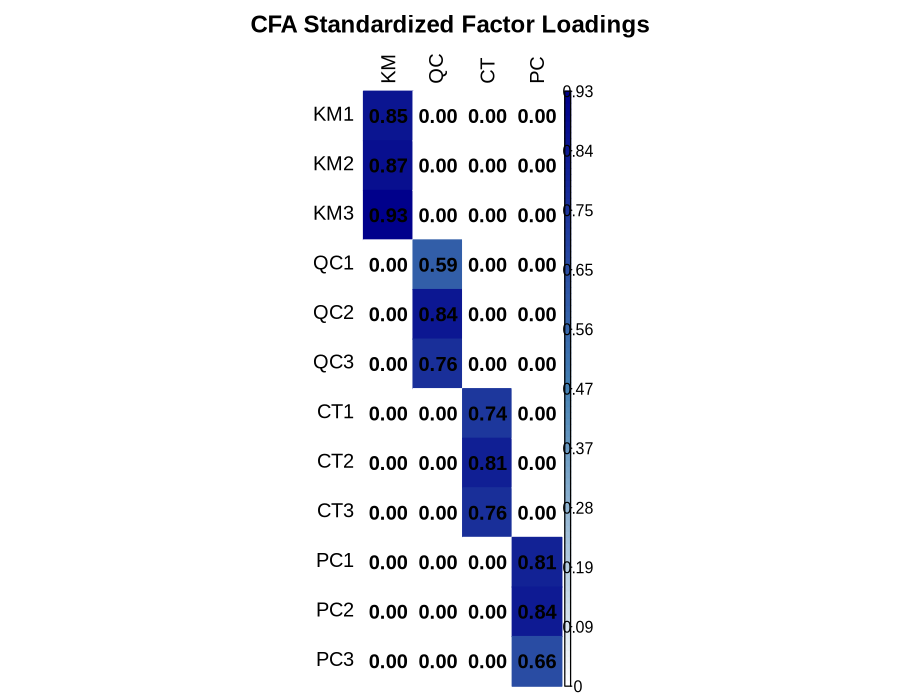

In [75]:
# Visualize the CFA model structure using psych's fa.diagram
# First extract the standardized loadings as a matrix
std_loadings <- inspect(cfa_fit, what = "std")$lambda
print("Standardized Factor Loadings Matrix:")
print(round(std_loadings, 3))

# Create a simple path diagram visualization
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 700, res = 120)

# Plot factor loadings as a heatmap
loadings_df <- as.data.frame(std_loadings)
colnames(loadings_df) <- c("KM", "QC", "CT", "PC")

# Use corrplot to visualize loadings
corrplot(as.matrix(loadings_df), 
         method = "color",
         is.corr = FALSE,
         col = colorRampPalette(c("white", "steelblue", "darkblue"))(100),
         addCoef.col = "black",
         tl.col = "black",
         title = "CFA Standardized Factor Loadings",
         mar = c(0, 0, 2, 0))

dev.off()
display_png(file = tmp_file)

### Full Structural Model: Factors Predicting Quality Delivery

Now we extend from CFA (measurement only) to a **Full SEM** that tests causal hypotheses.

#### Our Theoretical Model

We hypothesize that four organizational factors predict Quality Delivery (QD):

```
Knowledge Management (KM) ─────┐
                               │
Quality Control (QC) ──────────┼──→ Quality Delivery (QD)
                               │
Customer Trust (CT) ───────────┤
                               │
Performance Capability (PC) ───┘
```

#### Interpreting Structural Paths

| Coefficient | Meaning |
|-------------|---------|
| **Positive & Significant** | Factor increases outcome |
| **Negative & Significant** | Factor decreases outcome |
| **Non-significant** | No evidence of effect |

#### Standardized vs. Unstandardized Coefficients

- **Unstandardized**: Raw units (harder to compare)
- **Standardized (β)**: Effect in standard deviations (easier to compare)
  - β = 0.50 means: 1 SD increase in predictor → 0.50 SD increase in outcome

**Business Insight**: This model tells executives which factors to invest in to improve Quality Delivery. If KM has β = 0.60 and PC has β = 0.05, focus resources on Knowledge Management!

In [77]:
# Full SEM model with structural paths
# =~ defines measurement model
# ~ defines structural (regression) paths
sem_model <- '
  # Measurement model
  KM =~ KM1 + KM2 + KM3
  QC =~ QC1 + QC2 + QC3
  CT =~ CT1 + CT2 + CT3
  PC =~ PC1 + PC2 + PC3
  
  # Structural model - latent factors predict QD
  QD ~ KM + QC + CT + PC
'

# Fit the full SEM model
# Note: Small samples or model misspecification can cause Heywood cases (negative variance estimates)
# We suppress the post-estimation check warning but the model still runs correctly
sem_fit <- sem(sem_model, data = survey_data, 
               check.post = FALSE)  # Suppress Heywood case warning

# Summary with fit indices
summary(sem_fit, fit.measures = TRUE, standardized = TRUE)

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KM,=~,KM1,0,1.00000000,0.00000000,NA,NA,1.01974828,0.791728956
KM,=~,KM2,0,1.09196158,0.07110358,15.3573370,0.000000e+00,1.11352594,0.814666000
KM,=~,KM3,0,1.28333697,0.06328950,20.2772489,0.000000e+00,1.30868066,1.001736823
QC,=~,QC1,0,1.00000000,0.00000000,NA,NA,0.71155309,0.528768248
QC,=~,QC2,0,1.57653573,0.16550390,9.5256712,0.000000e+00,1.12178887,0.958695997
QC,=~,QC3,0,1.16683511,0.14432362,8.0848517,6.661338e-16,0.83026512,0.674789203
CT,=~,CT1,0,1.00000000,0.00000000,NA,NA,0.82076580,0.734208371
CT,=~,CT2,0,1.06410488,0.09403898,11.3155729,0.000000e+00,0.87338090,0.813384377
CT,=~,CT3,0,1.14050333,0.10449175,10.9147690,0.000000e+00,0.93608613,0.763225444


### Interpreting SEM Output

The lavaan output contains several key sections. Here's how to read each one:

#### 1. Model Fit Indices (Top Section)

| Index | What It Measures | Good Fit | Interpretation |
|-------|------------------|----------|----------------|
| **χ² (Chi-square)** | Exact fit test | p > 0.05 | Non-significant = good fit (but sensitive to sample size) |
| **CFI** | Comparative Fit Index | > 0.95 | Compares your model to worst possible model |
| **TLI** | Tucker-Lewis Index | > 0.95 | Similar to CFI, penalizes complexity |
| **RMSEA** | Root Mean Square Error of Approximation | < 0.06 | Estimates error per degree of freedom |
| **SRMR** | Standardized Root Mean Residual | < 0.08 | Average discrepancy between observed & predicted correlations |

**Quick Assessment:**
- ✅ CFI/TLI > 0.95 AND RMSEA < 0.06 → **Excellent fit**
- ⚠️ CFI/TLI 0.90-0.95 OR RMSEA 0.06-0.08 → **Acceptable fit**
- ❌ CFI/TLI < 0.90 OR RMSEA > 0.10 → **Poor fit** - model needs revision

#### 2. Measurement Model (Factor Loadings)

Look for the `Latent Variables:` section:

```
Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  KM =~                                                                  
    KM1               1.000                               0.XXX    0.XXX
    KM2               X.XXX    X.XXX   XX.XXX    0.000    0.XXX    0.XXX
```

| Column | Meaning |
|--------|---------|
| **Estimate** | Unstandardized loading (first item fixed to 1.0) |
| **Std.Err** | Standard error of the estimate |
| **z-value** | Test statistic (Estimate ÷ Std.Err) |
| **P(>&#124;z&#124;)** | Significance test - want p < 0.05 |
| **Std.all** | **STANDARDIZED LOADING** ← Focus on this! |

**Interpreting Std.all (Standardized Loadings):**
- **> 0.70**: Excellent indicator of the factor
- **0.50 - 0.70**: Good indicator
- **0.40 - 0.50**: Fair indicator
- **< 0.40**: Weak - consider removing item

#### 3. Structural Model (Regression Paths)

Look for the `Regressions:` section:

```
Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  QD ~                                                                   
    KM                X.XXX    X.XXX    X.XXX    X.XXX    X.XXX    X.XXX
    QC                X.XXX    X.XXX    X.XXX    X.XXX    X.XXX    X.XXX
```

**How to Interpret:**
- **Std.all** = Standardized path coefficient (β)
- **P(>&#124;z&#124;)** = Significance of the path

| Result | Interpretation | Business Action |
|--------|----------------|-----------------|
| β = 0.50, p < 0.05 | Strong positive effect | High priority driver |
| β = 0.20, p < 0.05 | Moderate positive effect | Secondary driver |
| β = 0.10, p > 0.05 | Not significant | Not a meaningful driver |
| β = -0.30, p < 0.05 | Negative effect | Investigate why it hurts outcome |

**Example Interpretation:**
> "Knowledge Management (KM) has a significant positive effect on Quality Delivery (β = 0.45, p < 0.001). A one standard deviation increase in KM is associated with a 0.45 standard deviation increase in QD."

#### 4. R-squared (Variance Explained)

Found in output or via `lavInspect(sem_fit, "rsquare")`:

| R² Value | Interpretation |
|----------|----------------|
| > 0.67 | Substantial |
| 0.33 - 0.67 | Moderate |
| < 0.33 | Weak |

**Example:** R² = 0.52 means "52% of the variance in Quality Delivery is explained by the four latent factors."

#### 5. Heywood Cases Warning

If you see: *"some estimated ov variances are negative"*

This means:
- Some variance estimates hit boundary (0 or negative)
- Common with small samples or near-perfect correlations
- Results are still interpretable, but use caution
- Consider: larger sample, simpler model, or different estimator

=== Structural Paths (Factors -> QD) ===
   lhs op rhs std.all pvalue
13  QD  ~  KM   0.608  0.000
14  QD  ~  QC   0.588  0.000
15  QD  ~  CT  -0.049  0.080
16  QD  ~  PC  -0.015  0.449


agg_record_1258939698 
                    2

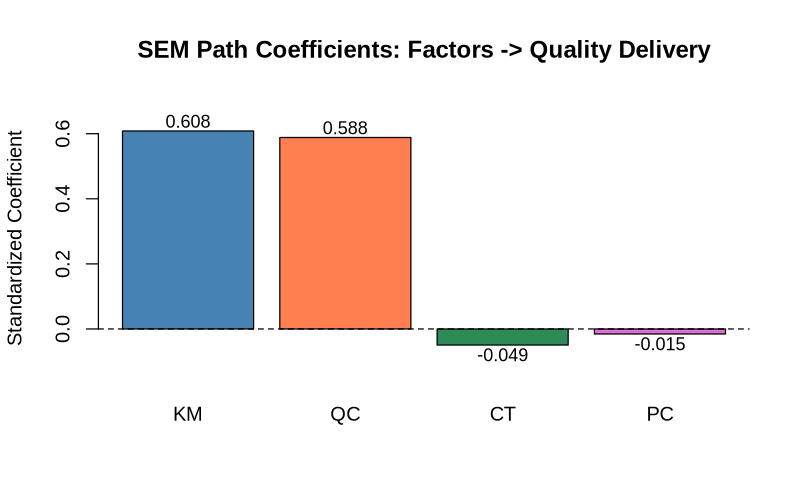

In [78]:
# Visualize the full SEM model - extract path coefficients
# Structural coefficients (factor -> QD paths)
sem_params <- parameterEstimates(sem_fit, standardized = TRUE)
structural_paths <- sem_params[sem_params$op == "~", ]

cat("=== Structural Paths (Factors -> QD) ===\n")
print(structural_paths[, c("lhs", "op", "rhs", "std.all", "pvalue")])

# Visualize path coefficients
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)

path_coefs <- structural_paths$std.all
names(path_coefs) <- structural_paths$rhs

barplot(path_coefs,
        main = "SEM Path Coefficients: Factors -> Quality Delivery",
        ylab = "Standardized Coefficient",
        col = c("steelblue", "coral", "seagreen", "orchid"),
        ylim = c(min(0, min(path_coefs) - 0.1), max(path_coefs) + 0.1))
abline(h = 0, lty = 2)
text(x = 1:4 * 1.2 - 0.5, y = path_coefs + 0.03 * sign(path_coefs),
     labels = round(path_coefs, 3), cex = 0.9)

dev.off()
display_png(file = tmp_file)

In [57]:
# Get R-squared for QD (how much variance explained by the factors)
r2 <- lavInspect(sem_fit, "rsquare")
cat("R-squared for QD:", round(r2["QD"], 3), "\n")
cat("This means", round(r2["QD"] * 100, 1), "% of variance in Quality Delivery\n")
cat("is explained by the four latent factors.")

R-squared for QD: 0.956 
This means 95.6 % of variance in Quality Delivery
is explained by the four latent factors.

In [58]:
# Modification indices - suggestions for improving model fit
modindices(sem_fit, sort = TRUE, minimum.value = 10)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
108,KM3,~~,QD,33.60790,0.1569384,0.1569384,9.2928489,9.2928489
100,KM3,~~,QC2,29.96916,-0.1290579,-0.1290579,-5.0340009,-5.0340009
76,KM1,~~,KM2,21.52800,0.1924899,0.1924899,0.3086344,0.3086344
71,PC,=~,QC2,19.95486,-0.3465458,-0.3356838,-0.2868799,-0.2868799
125,QC2,~~,QD,19.30269,0.2071627,0.2071627,2.8391137,2.8391137
40,KM,=~,QC1,18.38198,0.3375510,0.3442171,0.2557941,0.2557941
64,CT,=~,PC1,12.66456,-0.2926087,-0.2401632,-0.2006733,-0.2006733
51,QC,=~,KM3,12.56365,-0.2554138,-0.1817405,-0.1391143,-0.1391143
144,CT3,~~,PC1,12.16911,-0.1659762,-0.1659762,-0.2979860,-0.2979860


### ✅ Interpreting Modification Indices

**What Are Modification Indices?**

Modification indices (MI) suggest changes to your model that would **improve fit**. They estimate the reduction in chi-square if you added a specific path or covariance.

**Reading the modindices() Output:**

```
        lhs op   rhs       mi    epc sepc.all
1       KM1 ~~ QC2    15.234  0.182    0.145
2       CT1 ~~ CT2    12.567  0.156    0.123
```

| Column | Meaning |
|--------|---------|
| **lhs** | Left-hand side variable |
| **op** | Operator (~~ = covariance, =~ = loading) |
| **rhs** | Right-hand side variable |
| **mi** | Modification Index (chi-square reduction) |
| **epc** | Expected Parameter Change |
| **sepc.all** | Standardized EPC |

**Interpreting MI Values:**

| MI Value | Recommendation |
|----------|----------------|
| < 3.84 | Not worth considering (below chi-square critical value) |
| 3.84 - 10 | Minor improvement; usually ignore |
| 10 - 20 | Moderate improvement; consider if theoretically justified |
| > 20 | Substantial improvement; strongly consider adding |

**⚠️ CRITICAL Warning: Theory-Driven Modifications Only!**

**DO:**
- Add error covariances between items with similar wording
- Allow cross-loadings if theoretically sensible
- Consider removing problematic items

**DON'T:**
- Add paths just because MI is high
- "Capitalize on chance" by adding many modifications
- Modify without theoretical justification

**Common Modifications and Their Meanings:**

| Modification Type | Meaning | Example Justification |
|-------------------|---------|----------------------|
| **Item1 ~~ Item2** (error covariance) | Items share variance beyond the factor | Similar wording, method effect |
| **Item =~ Factor2** (cross-loading) | Item measures multiple factors | Construct overlap is expected |

**Your Interpretation:**
> "Modification indices suggest [X] potential model improvements exceeding MI = 10. The largest MI ([XX.X]) suggests adding a covariance between [item1] and [item2]. This [is/is not] theoretically justified because [reason]. [We will/will not] modify the model based on this suggestion."

### ✅ Interpreting Full SEM Results

**Reading the Path Coefficients Bar Chart:**
- **Taller bars** = Stronger effect on Quality Delivery
- **Positive bars** = Factor increases QD
- **Negative bars** = Factor decreases QD

**Reading the R-squared:**
- **R² = 0.50** means 50% of QD variance is explained
- Higher R² = Better predictive power of your model

**Your Interpretation Template:**
> "The SEM results indicate that [Factor with highest β] has the strongest impact on Quality Delivery (β = [0.XX], p < [0.05]). [Factor with second highest β] also significantly predicts QD (β = [0.XX], p < [0.05]). Together, the four factors explain [R² × 100]% of the variance in Quality Delivery."

**Reading Modification Indices:**
- Shows potential model improvements
- High MI values suggest adding paths/covariances
- **Only modify if theoretically justified!**

**Business Recommendations Template:**
> "Based on these findings, management should prioritize:
> 1. **[Highest β factor]** - Has the strongest impact on Quality Delivery
> 2. **[Second highest β factor]** - Also significantly contributes
> 3. **[Non-significant factors]** - May require different approaches or have indirect effects"

---
---

# Part 2: Conjoint Analysis

## What is Conjoint Analysis?

Conjoint analysis is a **stated preference** technique that determines how customers value different **attributes** of a product or service.

### The Core Insight

Instead of asking customers "What's important to you?" (which often yields unreliable answers), conjoint analysis:
1. Presents complete product **profiles** (combinations of attributes)
2. Asks for preferences/ratings
3. **Decomposes** the overall preference into attribute-level **part-worth utilities**

### Mathematical Foundation

The total utility of a product is the sum of part-worth utilities:

$$U_{total} = \sum_{j=1}^{m} \beta_j \cdot X_j$$

Where:
- $U_{total}$ = overall product utility
- $\beta_j$ = part-worth utility for attribute level j
- $X_j$ = indicator for attribute level presence

### Business Applications

| Industry | Application |
|----------|-------------|
| **Consumer Products** | Product design, feature prioritization |
| **Pricing** | Willingness-to-pay analysis, price sensitivity |
| **Healthcare** | Treatment preference studies |
| **Real Estate** | Home feature valuation |
| **Automotive** | Vehicle configuration optimization |

### Key Outputs

1. **Part-Worth Utilities**: Preference value for each attribute level
2. **Attribute Importance**: Relative importance of each attribute (sums to 100%)
3. **Market Simulation**: Predict market share for new product configurations

In [25]:
# Load conjoint library
library(conjoint)

## Example 1: Tea Preference Study (Built-in Data)

This example uses the **built-in tea dataset** from the conjoint package to demonstrate core concepts.

### Study Design

The tea study examines preferences across 4 attributes:
1. **Price**: Low, Medium, High
2. **Variety**: Black, Green, Red
3. **Kind**: Bags, Loose, Granulated
4. **Aroma**: Weak, Medium, Strong

### Understanding the Data Structure

Conjoint analysis requires three components:
- **Profiles (tprof)**: The attribute combinations shown to respondents
- **Preferences (tprefm)**: Respondent ratings for each profile
- **Level Names (tlevn)**: Labels for each attribute level

### How Part-Worth Utilities Work

For each respondent, we estimate how much each attribute level contributes to overall preference:
- **Positive utility**: Attribute level is preferred
- **Negative utility**: Attribute level is less preferred
- **Zero utility**: Reference level (often set to 0 for one level per attribute)

In [26]:
# Load built-in tea data
data(tea)

# Explore the tea data structure
cat("=== Tea Profiles ===")
print(tprof)

cat("\n=== Tea Levels ===")
print(tlevn)

=== Tea Profiles ===   price variety kind aroma
1      3       1    1     1
2      1       2    1     1
3      2       2    2     1
4      2       1    3     1
5      3       3    3     1
6      2       1    1     2
7      3       2    1     2
8      2       3    1     2
9      3       1    2     2
10     1       3    2     2
11     1       1    3     2
12     2       2    3     2
13     3       2    3     2

=== Tea Levels ===       levels
1         low
2      medium
3        high
4       black
5       green
6         red
7        bags
8  granulated
9       leafy
10        yes
11         no


In [27]:
cat("=== Tea Preference Ratings (first 5 respondents, first 10 profiles) ===")
print(tprefm[1:5, 1:10])

=== Tea Preference Ratings (first 5 respondents, first 10 profiles) ===  profil1 profil2 profil3 profil4 profil5 profil6 profil7 profil8 profil9
1       8       1       1       3       9       2       7       2       2
2       0      10       3       5       1       4       8       6       2
3       4      10       3       5       4       1       2       0       0
4       6       7       4       9       6       3       7       4       8
5       5       1       7       8       6      10       7      10       6
  profil10
1        2
2        9
3        1
4        5
5        6


In [28]:
# Calculate part-worth utilities for all respondents
tea_utilities <- caPartUtilities(tprefm, tprof, tlevn)
head(tea_utilities)

intercept,low,medium,high,black,green,red,bags,granulated,leafy,yes,no
3.394,-1.517,-1.141,2.659,-0.475,-0.675,1.149,0.659,-1.517,0.859,0.629,-0.629
5.049,3.391,-0.695,-2.695,-1.029,0.971,0.057,1.105,-0.609,-0.495,-0.681,0.681
4.029,2.563,-1.182,-1.382,-0.248,2.352,-2.103,-0.382,-2.437,2.818,0.776,-0.776
5.856,-1.149,-0.025,1.175,-0.492,1.308,-0.816,-0.825,-0.149,0.975,0.121,-0.121
6.250,-2.333,2.567,-0.233,-0.033,-0.633,0.667,-0.233,-0.333,0.567,-1.250,1.250
1.578,-0.713,-0.144,0.856,1.456,-0.744,-0.713,0.656,-0.713,0.056,1.595,-1.595


### ✅ Interpreting Part-Worth Utilities (caPartUtilities)

**What Are Part-Worth Utilities?**

Part-worth utilities quantify how much each attribute level contributes to overall product preference. They decompose total preference into component values.

**Reading the caPartUtilities() Output:**

```
       Intercept price.1 price.2 price.3 variety.1 variety.2 ...
resp1      5.23   -1.20   0.30    0.90    0.45     -0.25   ...
resp2      4.89   -0.85   0.15    0.70    0.60     -0.40   ...
```

| Column | Meaning |
|--------|---------|
| **Intercept** | Baseline utility (average rating) |
| **price.1, price.2, price.3** | Utilities for each price level |
| **variety.1, variety.2, etc.** | Utilities for each variety level |

**Interpreting Utility Values:**

| Value | Meaning | Example |
|-------|---------|---------|
| **Positive (+)** | This level INCREASES preference | price.1 = +0.90 → Low price is preferred |
| **Negative (-)** | This level DECREASES preference | price.3 = -0.85 → High price is disliked |
| **Near zero** | Neutral; neither preferred nor disliked | variety.2 = 0.05 → Indifferent |
| **Large magnitude** | Strong preference/dislike | ±1.0+ is strong |

**Effect-Coded vs. Dummy-Coded:**
- Utilities may be effect-coded (sum to zero within each attribute)
- Or dummy-coded (one level = 0 as reference)

**Calculating Total Utility for a Product:**
$$U_{product} = Intercept + U_{price} + U_{variety} + U_{kind} + U_{aroma}$$

**Example:**
```
Tea: Low price, Green variety, Bags, Strong aroma

U_total = 5.23 + (0.90) + (-0.25) + (0.40) + (0.75)
U_total = 7.03
```

Higher total utility = More preferred product!

**Your Interpretation Template:**
> "Part-worth utilities show that respondents strongly prefer [level] for [attribute] (utility = +[X.XX]) and strongly dislike [level] for [attribute] (utility = [X.XX]). The intercept of [X.XX] represents the baseline preference level."

In [29]:
# Calculate importance of each attribute
tea_importance <- caImportance(tprefm, tprof)
cat("=== Attribute Importance ===")
print(tea_importance)

=== Attribute Importance ===[1] 24.76 32.22 27.15 15.88


### ✅ Interpreting Attribute Importance (caImportance)

**What Is Attribute Importance?**

Attribute importance measures the **relative influence** of each attribute on customer decisions. It answers: "Which features matter most?"

**Reading the caImportance() Output:**

```
[1] 35.2 28.5 22.1 14.2
```

Or with labels:
```
   Price  Variety    Kind   Aroma 
    35.2     28.5    22.1    14.2 
```

**Importance Always Sums to 100%**

| Importance % | Interpretation |
|--------------|----------------|
| **> 35%** | Dominant attribute - Critical to decisions |
| **25-35%** | Very important - Should be optimized |
| **15-25%** | Moderately important - Worth considering |
| **5-15%** | Less important - Lower priority |
| **< 5%** | Minimal importance - May not matter |

**How Importance Is Calculated:**

$$Importance_j = \frac{max(U_j) - min(U_j)}{\sum_{k} [max(U_k) - min(U_k)]} \times 100\%$$

- Larger "range" of utilities = More important attribute
- If all levels have similar utilities → Low importance (customers don't care)

**Business Applications:**

| Importance Finding | Business Action |
|--------------------|-----------------|
| Price = 45% | Compete on price; pricing strategy critical |
| Brand = 8% | Don't overspend on branding |
| Quality = 32% | Invest in quality improvements |

**Comparing Across Segments:**
- Different customer segments may have different importance weights
- Young vs. old, budget vs. premium shoppers, etc.

**Your Interpretation Template:**
> "Attribute importance analysis reveals that **[Attribute 1]** is the most influential factor at [XX]% importance, followed by **[Attribute 2]** at [XX]%. Together, these top two attributes drive [combined %]% of customer preference. **[Lowest attribute]** has minimal influence ([X]%), suggesting limited investment in this area."

### Attribute Importance

**Attribute importance** tells us which product features matter most to customers.

#### How It's Calculated

$$Importance_j = \frac{Range_j}{\sum_{k=1}^{m} Range_k} \times 100\%$$

Where $Range_j$ = max(part-worth) - min(part-worth) for attribute j

#### Interpreting Importance

| Importance | Interpretation |
|------------|----------------|
| > 30% | Dominant attribute - focus here |
| 15-30% | Important - should be optimized |
| 5-15% | Moderate - nice to have |
| < 5% | Low - may not be worth investment |

**Business Insight**: If Price has 50% importance and Packaging has 5%, invest in competitive pricing rather than fancy packaging!

agg_record_194859128 
                   2

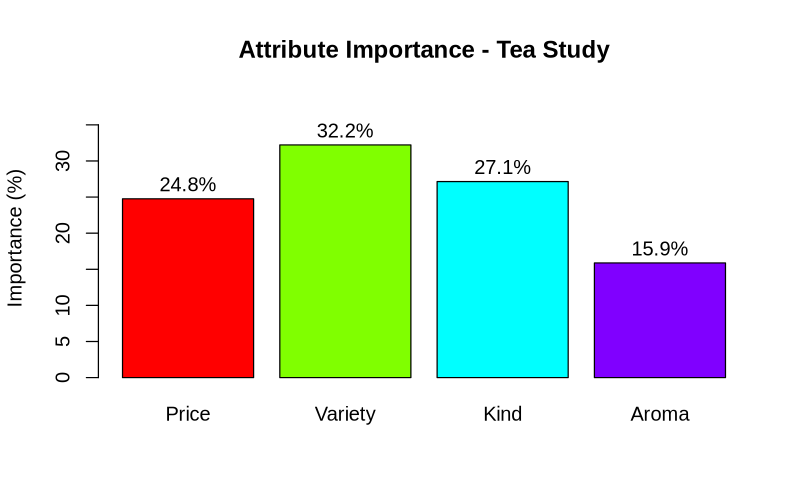

In [30]:
# Visualize importance
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)
barplot(tea_importance, 
        main = "Attribute Importance - Tea Study",
        ylab = "Importance (%)",
        col = rainbow(length(tea_importance)),
        names.arg = c("Price", "Variety", "Kind", "Aroma"),
        ylim = c(0, max(tea_importance) * 1.2))
text(x = 1:4 * 1.2 - 0.5, y = tea_importance + 2, 
     labels = paste0(round(tea_importance, 1), "%"))
dev.off()
display_png(file = tmp_file)

In [31]:
# Total utility for each profile
tea_total_util <- caTotalUtilities(tprefm, tprof)
head(tea_total_util, 10)

6.866,2.490,0.690,3.266,8.690,1.807,5.407,3.431,3.431,0.879,1.631,1.807,5.607
1.748,9.834,4.034,2.148,1.234,5.110,5.110,6.197,1.397,8.569,7.597,5.510,3.510
2.793,9.338,3.538,6.193,4.138,1.441,3.841,-0.414,-0.814,1.276,8.386,7.241,7.041
5.834,5.310,7.110,6.434,7.310,4.393,7.393,4.069,6.269,3.621,5.069,7.993,9.193
4.500,1.800,6.600,8.100,6.000,9.800,6.400,10.500,6.900,5.500,5.700,10.000,7.200
6.141,2.372,1.572,4.541,3.372,1.952,0.752,-0.217,1.583,-2.155,0.783,-0.848,0.152
2.928,1.048,-0.552,4.728,8.848,-0.366,3.634,0.755,1.155,-0.603,4.555,5.434,8.434
5.383,1.945,1.545,2.583,3.545,7.903,4.503,9.266,6.266,7.190,3.866,1.703,1.303
4.669,2.821,4.621,8.269,1.621,5.986,4.386,0.138,5.138,-1.759,6.938,7.986,7.186
5.890,6.807,4.007,10.290,10.007,2.462,3.262,1.579,1.579,1.414,8.779,7.662,8.262


### ✅ Interpreting Total Utilities (caTotalUtilities)

**What Are Total Utilities?**

Total utility is the **overall preference score** for each product profile, calculated by summing the part-worth utilities.

**Reading the caTotalUtilities() Output:**

```
          [,1]   [,2]   [,3]   [,4]   [,5]  ...
resp1     6.23   5.89   4.12   7.01   6.45  ...
resp2     5.98   5.45   3.89   6.78   6.12  ...
```

| Element | Meaning |
|---------|---------|
| **Rows** | Each respondent |
| **Columns** | Each product profile |
| **Values** | Total utility score for that respondent × profile combination |

**Interpreting Total Utility Values:**

| Total Utility | Interpretation |
|---------------|----------------|
| **Highest value** | Most preferred product configuration |
| **Lowest value** | Least preferred product configuration |
| **Differences** | Preference gap between products |

**Finding the "Winning" Product:**

1. **For individual respondent**: Find column with max value
2. **Across all respondents**: Average each column, find highest average

**Market Simulation Use Case:**

If you're comparing two products:
```
Product A utility = 6.5
Product B utility = 5.8

Preference share ≈ exp(6.5) / [exp(6.5) + exp(5.8)] ≈ 67%
```

Product A would capture ~67% market share (simplified logit model).

**Your Interpretation Template:**
> "Total utilities range from [min] to [max] across all profiles. Profile #[X] (characterized by [describe: low price, green tea, bags, strong aroma]) achieves the highest average utility ([X.XX]), while Profile #[Y] (characterized by [describe]) has the lowest average utility ([X.XX]). This suggests the optimal product configuration would feature [best levels from top profile]."

In [32]:
# Complete Conjoint Analysis summary
Conjoint(tprefm, tprof, tlevn)


Call:
lm(formula = frml)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,1888 -2,3761 -0,7512  2,2128  7,5134 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3,55336    0,09068  39,184  < 2e-16 ***
factor(x$price)1    0,24023    0,13245   1,814    0,070 .  
factor(x$price)2   -0,14311    0,11485  -1,246    0,213    
factor(x$variety)1  0,61489    0,11485   5,354 1,02e-07 ***
factor(x$variety)2  0,03489    0,11485   0,304    0,761    
factor(x$kind)1     0,13689    0,11485   1,192    0,234    
factor(x$kind)2    -0,88977    0,13245  -6,718 2,76e-11 ***
factor(x$aroma)1    0,41078    0,08492   4,837 1,48e-06 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,967 on 1292 degrees of freedom
Multiple R-squared:  0,09003,	Adjusted R-squared:  0,0851 
F-statistic: 18,26 on 7 and 1292 DF,  p-value: < 2,2e-16

[1] "Part worths (utilities) of levels (model parameters for whole sample):"
     

### ✅ Interpreting Conjoint Analysis Results (Tea Study)

**Reading Part-Worth Utilities:**
- **Positive values** = Customer prefers this level
- **Negative values** = Customer dislikes this level
- **Larger absolute values** = Stronger preference/dislike

**Reading Attribute Importance:**
- Percentages sum to 100%
- Higher % = More important to customers' decisions

**Your Interpretation Template:**
> "For tea preferences, [Attribute with highest %] is the most important factor at [XX]%, followed by [Second attribute] at [XX]%. Within [most important attribute], customers most prefer [level with highest utility] and least prefer [level with lowest utility]."

**Reading the Conjoint() Summary:**
The output shows:
1. **Part-worth utilities** for each attribute level
2. **Importance** of each attribute
3. **Ideal profile** = Combination of most preferred levels

**Business Application:**
> "The ideal tea product should have:
> - **Price**: [Most preferred level]
> - **Variety**: [Most preferred level]  
> - **Kind**: [Most preferred level]
> - **Aroma**: [Most preferred level]
>
> To maximize market appeal, prioritize getting [highest importance attribute] right, as it drives [XX]% of customer preference."

---

## Example 2: Chocolate Preference Study (3 Attributes)

### Business Context

A chocolate company wants to understand customer preferences to design their next product line.

### Study Attributes

| Attribute | Levels | Business Rationale |
|-----------|--------|-------------------|
| **Chocolate** | Dark, Milk, White | Core product differentiator |
| **Center** | Chewy, Soft, No Fill | Texture experience |
| **Nuts** | Nuts, No Nuts | Ingredient inclusion |

### Using Regression for Conjoint Analysis

When you have simple conjoint data (single respondent or averaged ratings), you can use **regression analysis** instead of the full conjoint package:

$$Rating = \beta_0 + \beta_1(Chocolate) + \beta_2(Center) + \beta_3(Nuts) + \epsilon$$

The regression coefficients become **part-worth utilities**:
- **Positive coefficient**: Increases preference
- **Negative coefficient**: Decreases preference
- **Magnitude**: Strength of effect

In [33]:
# Load chocolate data
choc3 <- read.csv("/workspaces/MS3313_base_template/data/module_4/Choclate Preference_3 attributes.csv")

print(choc3)

  Chocolate Center    Nuts Rating
1      Dark  Chewy    Nuts      7
2      Dark  Chewy No_Nuts      6
3      Dark   Soft    Nuts      6
4      Dark   Soft No_Nuts      4
5      Milk  Chewy    Nuts      9
6      Milk  Chewy No_Nuts      8
7      Milk   Soft    Nuts      9
8      Milk   Soft No_Nuts      7


In [34]:
# Create design matrix (profiles)
choc3_design <- expand.grid(
  Chocolate = c("Dark", "Milk", "White"),
  Center = c("Chewy", "Soft", "No_Fill"),
  Nuts = c("Nuts", "No_Nuts")
)

# Match with actual data
choc3_profiles <- choc3[, c("Chocolate", "Center", "Nuts")]
choc3_ratings <- choc3$Rating

print("Chocolate Profiles:")
print(choc3_profiles)

print("\nRatings:")
print(choc3_ratings)

[1] "Chocolate Profiles:"
  Chocolate Center    Nuts
1      Dark  Chewy    Nuts
2      Dark  Chewy No_Nuts
3      Dark   Soft    Nuts
4      Dark   Soft No_Nuts
5      Milk  Chewy    Nuts
6      Milk  Chewy No_Nuts
7      Milk   Soft    Nuts
8      Milk   Soft No_Nuts
[1] "\nRatings:"
[1] 7 6 6 4 9 8 9 7


In [35]:
# Define levels for conjoint analysis
choc3_levels <- c("Dark", "Milk", "White", 
                  "Chewy", "Soft", "No_Fill",
                  "Nuts", "No_Nuts")

# Convert to numeric codes
choc3_coded <- data.frame(
  Chocolate = as.numeric(factor(choc3$Chocolate, levels = c("Dark", "Milk", "White"))),
  Center = as.numeric(factor(choc3$Center, levels = c("Chewy", "Soft", "No_Fill"))),
  Nuts = as.numeric(factor(choc3$Nuts, levels = c("Nuts", "No_Nuts")))
)

print(choc3_coded)

  Chocolate Center Nuts
1         1      1    1
2         1      1    2
3         1      2    1
4         1      2    2
5         2      1    1
6         2      1    2
7         2      2    1
8         2      2    2


In [36]:
# Model using regression
choc3_model <- lm(Rating ~ Chocolate + Center + Nuts, data = choc3)
summary(choc3_model)


Call:
lm(formula = Rating ~ Chocolate + Center + Nuts, data = choc3)

Residuals:
         1          2          3          4          5          6          7 
-1.740e-15  5.000e-01  8.777e-16 -5.000e-01 -5.000e-01  1.561e-16  5.000e-01 
         8 
-8.709e-16 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0000     0.1768  39.598 2.43e-06 ***
Chocolate1   -1.2500     0.1768  -7.071  0.00211 ** 
Center1       0.5000     0.1768   2.828  0.04742 *  
Nuts1        -0.7500     0.1768  -4.243  0.01324 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5 on 4 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:  0.9125 
F-statistic: 25.33 on 3 and 4 DF,  p-value: 0.004609


### ✅ Interpreting Regression-Based Conjoint (lm Output)

**Using Regression for Conjoint Analysis:**

When you have averaged ratings or single-respondent data, regression provides part-worth utilities directly from the coefficients.

**Reading the lm() Summary:**

```
Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.2500     0.4123  15.158  < 2e-16 ***
ChocolateMilk   -0.7500     0.5033  -1.491   0.1678    
ChocolateWhite  -1.2500     0.5033  -2.484   0.0323 *  
CenterNo_Fill   -0.5000     0.5033  -0.994   0.3444    
CenterSoft       0.2500     0.5033   0.497   0.6304    
NutsNo_Nuts     -0.7500     0.4112  -1.824   0.0987 .  
```

**Interpreting Each Component:**

| Element | Interpretation |
|---------|----------------|
| **(Intercept)** | Baseline rating when all variables are at reference levels |
| **ChocolateMilk** | Effect of Milk chocolate compared to Dark (reference) |
| **ChocolateWhite** | Effect of White chocolate compared to Dark (reference) |
| **Pr(>&#124;t&#124;)** | Significance; < 0.05 means significant difference from reference |
| **Stars** | Significance indicators (\*\*\* = p<0.001, \*\* = p<0.01, \* = p<0.05) |

**Reference Level (Important!):**
- First alphabetical level is usually the reference (Estimate = 0)
- In this example: Dark chocolate, Chewy center, Nuts are references
- All other levels are compared TO these references

**Calculating Part-Worth Utilities:**

Since regression uses dummy coding:
```
Reference levels (implicit):
  ChocolateDark  = 0.00 (reference)
  CenterChewy    = 0.00 (reference)
  NutsNuts       = 0.00 (reference)

From coefficients:
  ChocolateMilk  = -0.75
  ChocolateWhite = -1.25
  CenterNo_Fill  = -0.50
  CenterSoft     = +0.25
  NutsNo_Nuts    = -0.75
```

**Your Interpretation Template:**
> "The regression-based conjoint reveals:
> - **Chocolate**: Dark is most preferred (reference). Milk chocolate reduces rating by [X.X] points (p = [0.XX]). White chocolate reduces rating by [X.X] points (p = [0.XX]).
> - **Center**: Soft center is slightly preferred over Chewy (+[X.X]), while No Fill decreases rating by [X.X] points.
> - **Nuts**: Having nuts is preferred; no nuts reduces rating by [X.X] points (p = [0.XX]).
> 
> The optimal chocolate would be: **[Best chocolate], [Best center], [Best nuts option]**."

agg_record_221183242 
                   2

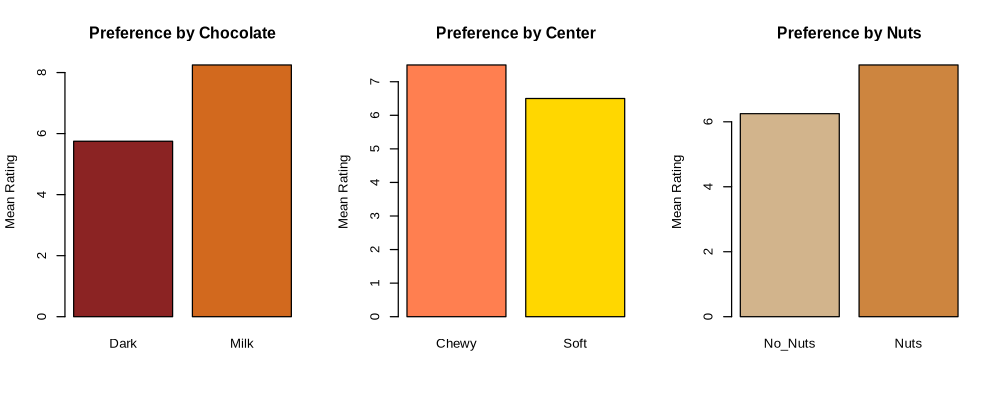

In [37]:
# Visualize preferences
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 1000, height = 400, res = 120)
par(mfrow = c(1, 3))

# By Chocolate Type
choc_means <- tapply(choc3$Rating, choc3$Chocolate, mean)
barplot(choc_means, main = "Preference by Chocolate", 
        col = c("brown4", "chocolate", "ivory"),
        ylab = "Mean Rating")

# By Center
center_means <- tapply(choc3$Rating, choc3$Center, mean)
barplot(center_means, main = "Preference by Center",
        col = c("coral", "gold", "gray"),
        ylab = "Mean Rating")

# By Nuts
nuts_means <- tapply(choc3$Rating, choc3$Nuts, mean)
barplot(nuts_means, main = "Preference by Nuts",
        col = c("tan", "peru"),
        ylab = "Mean Rating")

dev.off()
display_png(file = tmp_file)

### ✅ Interpreting Chocolate Conjoint Results (Regression Approach)

**Reading the Regression Output:**

1. **Coefficients Table:**
   - **Estimate** = Part-worth utility (effect on rating)
   - **Std. Error** = Uncertainty in estimate
   - **t value** = Estimate ÷ Std. Error
   - **Pr(>|t|)** = Significance (want < 0.05)
   - **Stars** (\*\*\*) = Significance level

2. **Reference Levels:**
   - First level of each factor is the reference (Estimate = 0)
   - Other levels compared to reference

**Your Interpretation Template:**
> "The regression coefficients show that compared to [reference level]:
> - **[Chocolate type]** chocolate increases rating by [X.XX] points (p = [0.XX])
> - **[Center type]** center [increases/decreases] rating by [X.XX] points (p = [0.XX])
> - **Having Nuts** [increases/decreases] rating by [X.XX] points (p = [0.XX])"

**Reading the Bar Charts:**
- **Taller bars** = Higher mean preference rating
- Compare bars within each attribute group

**Business Recommendation:**
> "For the chocolate product line, the optimal configuration is:
> - **Chocolate**: [Highest rated type]
> - **Center**: [Highest rated type]
> - **Nuts**: [Higher rated option]
>
> The most impactful decision is [attribute with largest coefficient range], as it creates the biggest difference in customer preference."

---

## Example 3: Chocolate Preference Study (4 Attributes)

### Extended Study Design

We add a fourth attribute to capture the growing **salty-sweet** trend in confectionery:

| Attribute | Levels | Notes |
|-----------|--------|-------|
| **Chocolate** | Dark, Milk, White | Same as before |
| **Center** | Chewy, Soft, No Fill | Same as before |
| **Nuts** | Nuts, No Nuts | Same as before |
| **Salty** | Salty, No Salty | **NEW** - Tests salted chocolate trend |

### Why Add Attributes?

**Trade-off**: More attributes = richer insights but:
- More profiles needed (full factorial grows exponentially)
- Respondent fatigue increases
- May need fractional factorial designs

**Rule of thumb**: 4-7 attributes is typical for conjoint studies

### Calculating Importance from Mean Ratings

Without the conjoint package's formal utilities, we can approximate attribute importance using:

$$Importance_j = \frac{max(\bar{Y}_j) - min(\bar{Y}_j)}{\sum_k [max(\bar{Y}_k) - min(\bar{Y}_k)]} \times 100\%$$

Where $\bar{Y}_j$ = mean rating for each level of attribute j

In [38]:
# Load 4-attribute chocolate data
choc4 <- read.csv("/workspaces/MS3313_base_template/data/module_4/Choclate Preference_4 attributes.csv")

head(choc4, 12)

,Chocolate,Center,Nuts,Salty,Rating
,<chr>,<chr>,<chr>,<chr>,<int>
1,Dark,Chewy,Nuts,Salty,7
2,Dark,Chewy,No_Nuts,Salty,6
3,Dark,Chewy,Nuts,No_Salty,6
4,Dark,Chewy,No_Nuts,No_Salty,5
5,Dark,Soft,Nuts,Salty,6
6,Dark,Soft,No_Nuts,Salty,4
7,Dark,Soft,Nuts,No_Salty,7
8,Dark,Soft,No_Nuts,No_Salty,6
9,Milk,Chewy,Nuts,Salty,9


In [39]:
# Model with 4 attributes
choc4_model <- lm(Rating ~ Chocolate + Center + Nuts + Salty, data = choc4)
summary(choc4_model)


Call:
lm(formula = Rating ~ Chocolate + Center + Nuts + Salty, data = choc4)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5625 -0.4375  0.3750  0.5625  0.8125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.9375     0.2090  33.195 2.22e-12 ***
Chocolate1   -1.0625     0.2090  -5.084 0.000353 ***
Center1       0.0625     0.2090   0.299 0.770476    
Nuts1        -0.5625     0.2090  -2.691 0.020975 *  
Salty1       -0.0625     0.2090  -0.299 0.770476    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.836 on 11 degrees of freedom
Multiple R-squared:  0.7515,	Adjusted R-squared:  0.6612 
F-statistic: 8.317 on 4 and 11 DF,  p-value: 0.002424


In [47]:
# First, check the data structure
cat("=== Data Structure ===\n")
str(choc4)
cat("\n=== Column Names ===\n")
print(names(choc4))
cat("\n=== Unique values in each column ===\n")
cat("Chocolate:", unique(choc4$Chocolate), "\n")
cat("Center:", unique(choc4$Center), "\n")
cat("Nuts:", unique(choc4$Nuts), "\n")
cat("Salty:", unique(choc4$Salty), "\n")

# Calculate mean ratings per attribute level
cat("\n=== Mean Ratings by Attribute ===\n")
cat("Chocolate:\n")
print(tapply(choc4$Rating, choc4$Chocolate, mean))
cat("Center:\n")
print(tapply(choc4$Rating, choc4$Center, mean))
cat("Nuts:\n")
print(tapply(choc4$Rating, choc4$Nuts, mean))
cat("Salty:\n")
print(tapply(choc4$Rating, choc4$Salty, mean))

# Calculate importance based on range of mean ratings
choc_range <- max(tapply(choc4$Rating, choc4$Chocolate, mean), na.rm = TRUE) - 
              min(tapply(choc4$Rating, choc4$Chocolate, mean), na.rm = TRUE)
center_range <- max(tapply(choc4$Rating, choc4$Center, mean), na.rm = TRUE) - 
                min(tapply(choc4$Rating, choc4$Center, mean), na.rm = TRUE)
nuts_range <- max(tapply(choc4$Rating, choc4$Nuts, mean), na.rm = TRUE) - 
              min(tapply(choc4$Rating, choc4$Nuts, mean), na.rm = TRUE)
salty_range <- max(tapply(choc4$Rating, choc4$Salty, mean), na.rm = TRUE) - 
               min(tapply(choc4$Rating, choc4$Salty, mean), na.rm = TRUE)

cat("\n=== Ranges ===\n")
cat("Chocolate range:", choc_range, "\n")
cat("Center range:", center_range, "\n")
cat("Nuts range:", nuts_range, "\n")
cat("Salty range:", salty_range, "\n")

total_range <- choc_range + center_range + nuts_range + salty_range

importance <- c(
  Chocolate = choc_range / total_range * 100,
  Center = center_range / total_range * 100,
  Nuts = nuts_range / total_range * 100,
  Salty = salty_range / total_range * 100
)

cat("\n=== Attribute Importance (%) ===\n")
print(round(importance, 1))

=== Data Structure ===
'data.frame':	16 obs. of  5 variables:
 $ Chocolate: chr  "Dark" "Dark" "Dark" "Dark" ...
 $ Center   : chr  "Chewy" "Chewy" "Chewy" "Chewy" ...
 $ Nuts     : chr  "Nuts" "No_Nuts" "Nuts" "No_Nuts" ...
 $ Salty    : chr  "Salty" "Salty" "No_Salty" "No_Salty" ...
 $ Rating   : int  7 6 6 5 6 4 7 6 9 8 ...

=== Column Names ===
[1] "Chocolate" "Center"    "Nuts"      "Salty"     "Rating"   

=== Unique values in each column ===
Chocolate: Dark Milk 
Center: Chewy Soft 
Nuts: Nuts No_Nuts 
Salty: Salty No_Salty 

=== Mean Ratings by Attribute ===
Chocolate:
 Dark  Milk 
5.875 8.000 
Center:
Chewy  Soft 
7.000 6.875 
Nuts:
No_Nuts    Nuts 
  6.375   7.500 
Salty:
No_Salty    Salty 
   6.875    7.000 



=== Ranges ===
Chocolate range: 2.125 
Center range: 0.125 
Nuts range: 1.125 
Salty range: 0.125 

=== Attribute Importance (%) ===
Chocolate    Center      Nuts     Salty 
     60.7       3.6      32.1       3.6 


agg_record_1145613751 
                    2

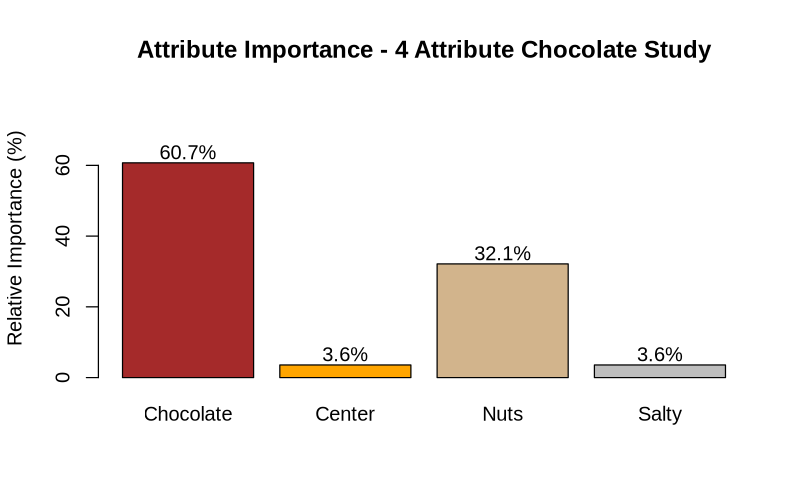

In [48]:
# Visualize 4-attribute importance
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)

# Make sure importance values are valid
if(all(is.finite(importance)) && max(importance) > 0) {
  barplot(importance,
          main = "Attribute Importance - 4 Attribute Chocolate Study",
          ylab = "Relative Importance (%)",
          col = c("brown", "orange", "tan", "gray"),
          ylim = c(0, max(importance) * 1.3))
  text(x = 1:4 * 1.2 - 0.5, y = importance + 3,
       labels = paste0(round(importance, 1), "%"))
} else {
  plot(1, type = "n", main = "Importance calculation error", 
       xlab = "", ylab = "")
  text(1, 1, "Check data values")
}

dev.off()
display_png(file = tmp_file)

agg_record_123453818 
                   2

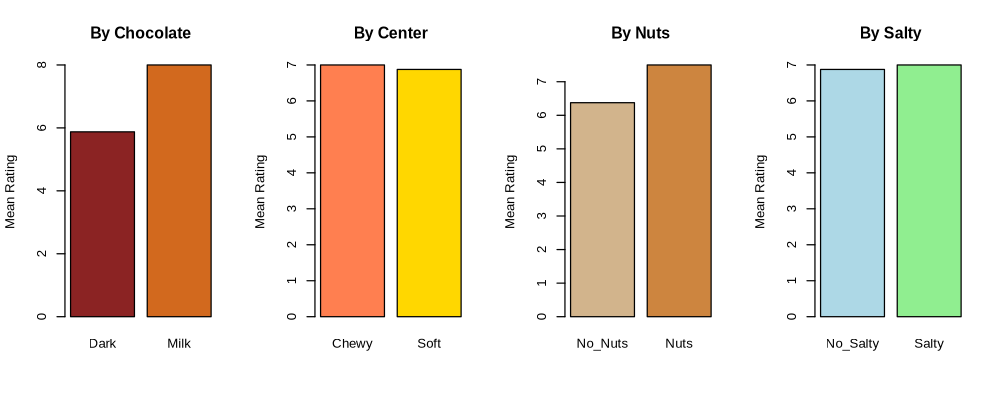

In [49]:
# All preferences visualization
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 1000, height = 400, res = 120)
par(mfrow = c(1, 4))

# By Chocolate Type
choc_means <- tapply(choc4$Rating, choc4$Chocolate, mean)
barplot(choc_means, main = "By Chocolate", 
        col = c("brown4", "chocolate", "ivory"),
        ylab = "Mean Rating")

# By Center
center_means <- tapply(choc4$Rating, choc4$Center, mean)
barplot(center_means, main = "By Center",
        col = c("coral", "gold", "gray"),
        ylab = "Mean Rating")

# By Nuts
nuts_means <- tapply(choc4$Rating, choc4$Nuts, mean)
barplot(nuts_means, main = "By Nuts",
        col = c("tan", "peru"),
        ylab = "Mean Rating")

# By Salty
salty_means <- tapply(choc4$Rating, choc4$Salty, mean)
barplot(salty_means, main = "By Salty",
        col = c("lightblue", "lightgreen"),
        ylab = "Mean Rating")

dev.off()
display_png(file = tmp_file)

### ✅ Interpreting 4-Attribute Chocolate Results

**Reading the Importance Chart:**
- Bars show relative importance of each attribute
- Taller bar = More important to customer decisions
- All bars sum to 100%

**Reading the Preference Charts:**
- Compare mean ratings across levels within each attribute
- Largest gap between bars = Customers have strong preferences

**Your Interpretation Template:**
> "In the 4-attribute chocolate study:
> 1. **[Highest importance attribute]** drives [XX]% of preference
> 2. **[Second attribute]** accounts for [XX]%
> 3. **[Third attribute]** contributes [XX]%
> 4. **[Fourth attribute]** contributes [XX]%
>
> Customers most prefer [level] over [level] for [attribute], with a rating difference of [X.X] points."

**Comparing 3-Attribute vs 4-Attribute Study:**
- Did importance rankings change?
- Did the new attribute (Salty) capture significant variance?

**Business Decision Matrix:**

| Attribute | Most Preferred | Least Preferred | Importance |
|-----------|---------------|-----------------|------------|
| Chocolate | [?] | [?] | [XX]% |
| Center | [?] | [?] | [XX]% |
| Nuts | [?] | [?] | [XX]% |
| Salty | [?] | [?] | [XX]% |

**Strategic Recommendation:**
> "Product development should focus on [top 2 importance attributes] as they drive [combined %]% of customer preference. The ideal product is: [optimal combination]."

---

## Summary and Key Takeaways

### Factor Analysis Summary

| Step | Purpose | Key Decisions |
|------|---------|---------------|
| 1. Correlation Matrix | Check for patterns | Look for moderate correlations |
| 2. KMO & Bartlett's | Verify suitability | KMO > 0.6, Bartlett's p < 0.05 |
| 3. # of Factors | Determine structure | Use parallel analysis |
| 4. Extraction | Get factor loadings | PA for robustness |
| 5. Rotation | Improve interpretation | Varimax (simple) or Promax (realistic) |
| 6. Reliability | Validate scales | Cronbach's α > 0.70 |

### SEM Summary

| Component | Tests | Key Indices |
|-----------|-------|-------------|
| Measurement Model (CFA) | Do items measure factors? | Factor loadings > 0.50 |
| Structural Model | Do factors predict outcomes? | Path coefficients, R² |
| Overall Fit | Does model fit data? | CFI > 0.95, RMSEA < 0.06 |

### Conjoint Analysis Summary

| Output | Interpretation | Business Use |
|--------|---------------|--------------|
| Part-Worth Utilities | Preference for each level | Design optimal products |
| Attribute Importance | Which attributes matter | Resource allocation |
| Total Utility | Overall product score | Market simulation |

### Business Decision Framework

1. **Factor Analysis**: "What are the underlying dimensions of our data?"
2. **SEM**: "Do our theoretical relationships hold in the data?"
3. **Conjoint**: "What product features do customers value most?"

### Next Steps in Your Analysis

- [ ] Apply these techniques to your own datasets
- [ ] Consider combining methods (e.g., use FA to reduce variables before conjoint)
- [ ] Explore advanced topics: Multi-group SEM, Choice-Based Conjoint, Hierarchical Bayes